In [ ]:
import os
video_folder = r'D:\DETECTION 1.0\Celeb-DF\Real'

for file in os.listdir(video_folder):
    print(file)


Celeb-real


In [ ]:
import os
import glob

# ========== Paths to Real and Fake Video Folders ==========
real_path = r'Celeb-DF/Real/Celeb-real'
fake_path = r'Celeb-DF/Fake/New folder'

# ========== Supported Video Extensions ==========
video_extensions = ['*.mp4', '*.MP4', '*.avi', '*.AVI', '*.mov', '*.MOV']

def count_videos(folder_path):
    video_files = set()
    for ext in video_extensions:
        pattern = os.path.join(folder_path, ext)
        video_files.update(glob.glob(pattern))
    return len(video_files), sorted(video_files)

# ========== Count Real ==========
real_count, real_files = count_videos(real_path)
print(f"🎬 Real videos found: {real_count}")

# ========== Count Fake ==========
fake_count, fake_files = count_videos(fake_path)
print(f"🎭 Fake videos found: {fake_count}")

# ========== Total ==========
total = real_count + fake_count
print(f"\n📊 Total videos: {total}")


🎬 Real videos found: 408
🎭 Fake videos found: 408

📊 Total videos: 816


In [ ]:
import os
import cv2
import glob

# ========== CONFIGURATION ==========

# Input video folders
real_video_path = r'Celeb-DF/Real/Celeb-real'


# Output frame folders
real_frame_path = r'Celeb-DF/Real Frames'


# Frame extraction settings
target_fps = 35
resize_dims = (256, 256)
valid_extensions = {'.mp4', '.avi', '.mov'}

# ========== FUNCTION TO COUNT UNIQUE VIDEOS ==========

def count_unique_videos(folder_path):
    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        return 0, []

    video_files = set()
    for file in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file)):
            ext = os.path.splitext(file)[1].lower()
            if ext in valid_extensions:
                video_files.add(file)

    return len(video_files), sorted(video_files)

# ========== FUNCTION TO EXTRACT FRAMES ==========

def extract_frames_from_videos(video_folder, output_root, label):
    print(f"\n📁 Processing {label} videos from: {video_folder}")
    os.makedirs(output_root, exist_ok=True)

    video_paths = []
    for ext in valid_extensions:
        video_paths.extend(glob.glob(os.path.join(video_folder, f'*{ext}')))
        video_paths.extend(glob.glob(os.path.join(video_folder, f'*{ext.upper()}')))  # for .MP4 etc.

    video_paths = sorted(set(video_paths))  # remove duplicates
    print(f"🎬 Found {len(video_paths)} unique {label.lower()} video(s).")

    for video_path in video_paths:
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        output_dir = os.path.join(output_root, video_name)
        os.makedirs(output_dir, exist_ok=True)

        print(f"\n🔄 Extracting from: {video_name}")
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"❌ Cannot open video: {video_path}")
            continue

        original_fps = cap.get(cv2.CAP_PROP_FPS)
        if not original_fps or original_fps < 1:
            print(f"⚠️ Invalid FPS detected, using default 30.")
            original_fps = 30

        frame_interval = max(1, int(original_fps / target_fps))
        print(f"📈 FPS: {original_fps:.2f} → Saving every {frame_interval} frame(s)")

        frame_count = 0
        saved_count = 0

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            if frame_count % frame_interval == 0:
                frame = cv2.resize(frame, resize_dims)
                frame_filename = os.path.join(output_dir, f"{video_name}_frame_{saved_count:05d}.jpg")
                cv2.imwrite(frame_filename, frame)
                saved_count += 1

            frame_count += 1

        cap.release()
        print(f"✅ Saved {saved_count} frame(s) from '{video_name}' to '{output_dir}'")

# ========== MAIN EXECUTION ==========

# Step 1: Count and display video totals
real_count, real_videos = count_unique_videos(real_video_path)

print(f"\n📊 Summary:")
print(f"🎬 Real videos: {real_count}")

# Step 2: Extract frames
extract_frames_from_videos(real_video_path, real_frame_path, label="Real")

print("\n✅ All frames extracted successfully!")



📊 Summary:
🎬 Real videos: 408

📁 Processing Real videos from: Celeb-DF/Real/Celeb-real
🎬 Found 408 unique real video(s).

🔄 Extracting from: 00000
📈 FPS: 30.00 → Saving every 1 frame(s)
✅ Saved 450 frame(s) from '00000' to 'Celeb-DF/Real Frames\00000'

🔄 Extracting from: 00001
📈 FPS: 30.00 → Saving every 1 frame(s)
✅ Saved 415 frame(s) from '00001' to 'Celeb-DF/Real Frames\00001'

🔄 Extracting from: 00002
📈 FPS: 30.00 → Saving every 1 frame(s)
✅ Saved 512 frame(s) from '00002' to 'Celeb-DF/Real Frames\00002'

🔄 Extracting from: 00003
📈 FPS: 30.00 → Saving every 1 frame(s)
✅ Saved 295 frame(s) from '00003' to 'Celeb-DF/Real Frames\00003'

🔄 Extracting from: 00004
📈 FPS: 30.00 → Saving every 1 frame(s)
✅ Saved 450 frame(s) from '00004' to 'Celeb-DF/Real Frames\00004'

🔄 Extracting from: 00005
📈 FPS: 30.00 → Saving every 1 frame(s)
✅ Saved 463 frame(s) from '00005' to 'Celeb-DF/Real Frames\00005'

🔄 Extracting from: 00006
📈 FPS: 30.00 → Saving every 1 frame(s)
✅ Saved 486 frame(s) from '

In [ ]:
csv_summary_path = r'D:\DETECTION 1.0\Celeb-DF\video_frame_summary.csv'

In [ ]:
import os

# ========== Folder Paths ==========
real_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Real Frames'
fake_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Fake Frames'

def count_image_frames(folder_path, image_ext='.jpg'):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        count += sum(1 for file in files if file.lower().endswith(image_ext))
    return count

# ========== Count Frames ==========
real_frames = count_image_frames(real_frame_path)
fake_frames = count_image_frames(fake_frame_path)

# ========== Print Summary ==========
print("🧮 Frame Extraction Summary")
print(f"🟩 Real frames: {real_frames}")
print(f"🟥 Fake frames: {fake_frames}")
print(f"📊 Total frames: {real_frames + fake_frames}")


🧮 Frame Extraction Summary
🟩 Real frames: 175289
🟥 Fake frames: 172315
📊 Total frames: 347604


In [ ]:
import os
import cv2
import mediapipe as mp
import numpy as np

# ========= CONFIG =========
real_frame_dir = r'D:\DETECTION 1.0\Celeb-DF\Real Frames'
fake_frame_dir = r'D:\DETECTION 1.0\Celeb-DF\Fake Frames'
real_output_root = r'D:\DETECTION 1.0\Celeb-DF\Real Frame Face Segmentation'
fake_output_root = r'D:\DETECTION 1.0\Celeb-DF\Fake Face Segmentation'

zone_names = ['eyes_left', 'eyes_right', 'brows_left', 'brows_right',
              'cheeks_left', 'cheeks_right', 'nose', 'mouth', 'jaw']

# Create output directories
for base in [real_output_root, fake_output_root]:
    for zone in zone_names:
        os.makedirs(os.path.join(base, zone), exist_ok=True)

# ========= MediaPipe Setup =========
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)

# ========= Landmark Groups =========
landmark_indices = {
    'eyes_left': [33, 133],
    'eyes_right': [362, 263],
    'brows_left': [70, 105],
    'brows_right': [336, 276],
    'cheeks_left': [50, 205],
    'cheeks_right': [280, 425],
    'nose': [1, 2, 98, 168],
    'mouth': [61, 291],
    'jaw': [103, 330]
}

# ========= Crop Function =========
def crop_zone(image, landmarks, indices, padding=10):
    h, w = image.shape[:2]
    points = np.array([[int(landmarks[i].x * w), int(landmarks[i].y * h)] for i in indices])
    x, y, w_box, h_box = cv2.boundingRect(points)
    x, y = max(x-padding, 0), max(y-padding, 0)
    x2, y2 = min(x+w_box+padding, image.shape[1]), min(y+h_box+padding, image.shape[0])
    return image[y:y2, x:x2]

# ========= Process Function =========
def process_frames(frame_dir, output_root):
    for root, _, files in os.walk(frame_dir):
        files = sorted(files, key=lambda f: int(''.join(filter(str.isdigit, f)) or 0))

        for file in files:
            if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            img_path = os.path.join(root, file)
            image = cv2.imread(img_path)
            if image is None:
                continue

            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = face_mesh.process(rgb)

            if not results.multi_face_landmarks:
                continue

            landmarks = results.multi_face_landmarks[0].landmark

            for zone, indices in landmark_indices.items():
                crop = crop_zone(image, landmarks, indices)
                out_path = os.path.join(output_root, zone, file)
                cv2.imwrite(out_path, crop)

# ========= Run on Real and Fake =========
print("📂 Processing Real Frames...")
process_frames(real_frame_dir, real_output_root)

print("📂 Processing Fake Frames...")
process_frames(fake_frame_dir, fake_output_root)

print("✅ Done: All facial zones extracted and saved.")


📂 Processing Real Frames...
📂 Processing Fake Frames...
✅ Done: All facial zones extracted and saved.


In [ ]:
import cv2
import os
import mediapipe as mp
import csv

# ========== CONFIG ==========
real_frame_path = r'Real Frames'              # Input frames
output_path = r'Real Frame Landmark'        # Annotated output
summary_csv = 'landmark_summary.csv'                   # Output CSV summary
os.makedirs(output_path, exist_ok=True)

# ========== MediaPipe Setup ==========
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)

# ========== Landmark Subset ==========
selected_indices = {
    "eyes": [33, 133, 362, 263],
    "nose": [1, 2, 98, 168],
    "lips": [61, 291]
}
all_indices = [i for region in selected_indices.values() for i in region]

# ========== Open CSV for writing ==========
summary_data = [("Folder", "Frame", "Landmarks Detected")]

# ========== Walk through folders and process ==========
for root, _, files in os.walk(real_frame_path):
    # Sort filenames numerically (e.g., frame_00000.jpg)
    sorted_files = sorted(files, key=lambda f: int(''.join(filter(str.isdigit, f)) or 0))

    for file in sorted_files:
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(root, file)
        image = cv2.imread(img_path)
        if image is None:
            continue

        h, w = image.shape[:2]
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(rgb)

        landmark_count = 0
        if results.multi_face_landmarks:
            landmarks = results.multi_face_landmarks[0].landmark

            for idx in all_indices:
                lm = landmarks[idx]
                x, y = int(lm.x * w), int(lm.y * h)
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
                cv2.putText(image, str(idx), (x + 5, y - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 1)
                landmark_count += 1

        # Save image to output directory with same substructure
        rel_path = os.path.relpath(img_path, real_frame_path)
        save_path = os.path.join(output_path, rel_path)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        cv2.imwrite(save_path, image)

        # Add to CSV summary
        subfolder = os.path.basename(os.path.dirname(img_path))
        summary_data.append((subfolder, file, landmark_count))

# ========== Write Summary CSV ==========
with open(summary_csv, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(summary_data)

print(f"✅ All frames processed in order, saved to: {output_path}")
print(f"📄 Landmark summary CSV saved to: {summary_csv}")


In [ ]:
import torch
print(torch.version.cuda)


c:\Users\ACER\anaconda3\envs\torch_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


11.1


In [ ]:
import torch
print(torch.__version__)


1.9.1+cu111


In [ ]:
import torch

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"Device Name: {torch.cuda.get_device_name(0)}")


PyTorch Version: 1.9.1+cu111
CUDA Available: True
CUDA Version: 11.1
Device Name: NVIDIA GeForce RTX 4050 Laptop GPU


In [ ]:
import os
import pandas as pd

In [ ]:
# Paths
real_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Real Frames'
fake_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Fake Frames'

# To store image paths and labels
dataset=[]

In [ ]:
import os
import csv

# Define paths
real_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Real Frames'
fake_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Fake Frames'
output_csv_path = r'D:\DETECTION 1.0\Celeb-DF\frame_labels.csv'  # Output CSV

# Allowed image extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

# Function to collect image paths and labels
def collect_data(image_dir, label):
    data = []
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(valid_extensions):
                full_path = os.path.join(root, file)
                data.append([full_path, label])
    return data

# Collect real and fake frame data
real_data = collect_data(real_frame_path, 0)
fake_data = collect_data(fake_frame_path, 1)

# Combine and save to CSV
all_data = real_data + fake_data

# Sort for consistency (optional)
all_data.sort()

# Write CSV
with open(output_csv_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['filepath', 'label'])  # Header
    writer.writerows(all_data)

print(f"[✓] CSV file saved at: {output_csv_path}")
print(f"Total Real Frames: {len(real_data)} | Total Fake Frames: {len(fake_data)} | Total: {len(all_data)}")


[✓] CSV file saved at: D:\DETECTION 1.0\Celeb-DF\frame_labels.csv
Total Real Frames: 175289 | Total Fake Frames: 172315 | Total: 347604


In [ ]:
import torch
import torch.nn as nn
from efficientnet_pytorch import EfficientNet

class TextureArtifactBranch(nn.Module):
    def __init__(self, pretrained=True):
        super(TextureArtifactBranch, self).__init__()
        
        # Load EfficientNet-B4 backbone
        self.backbone = EfficientNet.from_pretrained('efficientnet-b4') if pretrained else EfficientNet.from_name('efficientnet-b4')
        
        # Feature extractor (exclude classifier)
        self.feature_extractor = self.backbone.extract_features  # (B, 1792, H/32, W/32)
        
        # Global average pooling + classification head
        self.pooling = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1792, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Linear(512, 1),
            nn.Sigmoid()  # Binary output: real/fake
        )
    
    def forward(self, x):
        features = self.feature_extractor(x)
        pooled = self.pooling(features)
        out = self.classifier(pooled)
        return out


In [1]:
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset

class DeepfakeFrameDataset(Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data.iloc[idx, 0]
        label = int(self.data.iloc[idx, 1])
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)


c:\Users\ACER\anaconda3\envs\torch_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import csv

real_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Real Frames'
fake_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Fake Frames'
output_csv_path = r'D:\DETECTION 1.0\Celeb-DF\frame_labels.csv'

valid_extensions = ('.jpg', '.jpeg', '.png')

def collect_data(image_dir, label):
    data = []
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(valid_extensions):
                full_path = os.path.join(root, file)
                data.append([full_path, label])
    return data

real_data = collect_data(real_frame_path, 0)
fake_data = collect_data(fake_frame_path, 1)
all_data = real_data + fake_data
all_data.sort()

# Write to CSV
with open(output_csv_path, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['filepath', 'label'])
    writer.writerows(all_data)

print(f"[✓] CSV created at: {output_csv_path}")
print(f"Total entries: {len(all_data)}")


[✓] CSV created at: D:\DETECTION 1.0\Celeb-DF\frame_labels.csv
Total entries: 347604


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image, ImageFile
import pandas as pd
from tqdm import tqdm
from efficientnet_pytorch import EfficientNet
from torch.cuda.amp import autocast, GradScaler

ImageFile.LOAD_TRUNCATED_IMAGES = True


c:\Users\ACER\anaconda3\envs\torch_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
class DeepfakeFrameDataset(Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data.iloc[idx, 0]
        label = int(self.data.iloc[idx, 1])
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading {image_path}: {e}")
            return self.__getitem__((idx + 1) % len(self.data))
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.float32)


In [5]:
transform = transforms.Compose([
    transforms.Resize((380, 380)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

csv_path = r'D:\DETECTION 1.0\Celeb-DF\frame_labels.csv'
full_dataset = DeepfakeFrameDataset(csv_path, transform=transform)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)


In [6]:
class TextureArtifactBranch(nn.Module):
    def __init__(self, pretrained=True):
        super(TextureArtifactBranch, self).__init__()
        self.backbone = EfficientNet.from_pretrained('efficientnet-b4') if pretrained else EfficientNet.from_name('efficientnet-b4')
        self.feature_extractor = self.backbone.extract_features
        self.pooling = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1792, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 1)  # ⚠️ No sigmoid here
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.pooling(x)
        x = self.classifier(x)
        return x  # logits


In [7]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.sigmoid(inputs)
        pt = torch.where(targets == 1, pt, 1 - pt)
        loss = self.alpha * (1 - pt) ** self.gamma * BCE
        return loss.mean()


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if device.type == "cuda":
    print("GPU:", torch.cuda.get_device_name(0))

model = TextureArtifactBranch(pretrained=True).to(device)

# Freeze backbone if needed
for param in model.backbone.parameters():
    param.requires_grad = False

criterion = FocalLoss(alpha=0.25, gamma=2.0)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5)
scaler = GradScaler()


Using device: cuda
GPU: NVIDIA GeForce RTX 4050 Laptop GPU
Loaded pretrained weights for efficientnet-b4


In [16]:
epochs = 5
for epoch in range(epochs):
    print(f"\n🔁 Epoch {epoch+1}/{epochs}")
    model.train()
    train_loss, train_correct = 0.0, 0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device).unsqueeze(1)

        optimizer.zero_grad()
        with autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item() * images.size(0)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        train_correct += (preds == labels).sum().item()

    scheduler.step()

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_acc = train_correct / len(train_loader.dataset)
    print(f"✅ Train Loss: {avg_train_loss:.4f} | Accuracy: {train_acc:.4f}")

    # ===== Validation =====
    model.eval()
    val_loss, val_correct = 0.0, 0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            preds = (torch.sigmoid(outputs) > 0.5).float()
            val_correct += (preds == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = val_correct / len(val_loader.dataset)
    print(f"🧪 Val Loss: {avg_val_loss:.4f} | Accuracy: {val_acc:.4f}")



🔁 Epoch 1/5


Training: 100%|██████████| 8691/8691 [2:46:36<00:00,  1.15s/it]     


✅ Train Loss: 0.0113 | Accuracy: 0.9344


Validation: 100%|██████████| 2173/2173 [29:41<00:00,  1.22it/s]


🧪 Val Loss: 0.0061 | Accuracy: 0.9629

🔁 Epoch 2/5


Training: 100%|██████████| 8691/8691 [1:24:32<00:00,  1.71it/s]


✅ Train Loss: 0.0076 | Accuracy: 0.9564


Validation: 100%|██████████| 2173/2173 [18:45<00:00,  1.93it/s]


🧪 Val Loss: 0.0036 | Accuracy: 0.9789

🔁 Epoch 3/5


Training: 100%|██████████| 8691/8691 [1:13:19<00:00,  1.98it/s]


✅ Train Loss: 0.0059 | Accuracy: 0.9666


Validation: 100%|██████████| 2173/2173 [16:20<00:00,  2.22it/s]


🧪 Val Loss: 0.0023 | Accuracy: 0.9871

🔁 Epoch 4/5


Training: 100%|██████████| 8691/8691 [1:14:00<00:00,  1.96it/s]


✅ Train Loss: 0.0046 | Accuracy: 0.9743


Validation: 100%|██████████| 2173/2173 [20:41<00:00,  1.75it/s]


🧪 Val Loss: 0.0017 | Accuracy: 0.9907

🔁 Epoch 5/5


Training: 100%|██████████| 8691/8691 [1:13:11<00:00,  1.98it/s]


✅ Train Loss: 0.0039 | Accuracy: 0.9787


Validation: 100%|██████████| 2173/2173 [21:37<00:00,  1.67it/s]

🧪 Val Loss: 0.0013 | Accuracy: 0.9925


In [8]:
torch.save(model.state_dict(), "efficientnet_texture_artifact.pth")


In [9]:
model = TextureArtifactBranch(pretrained=False).to(device)
model.load_state_dict(torch.load("efficientnet_texture_artifact.pth"))
model.eval()


TextureArtifactBranch(
  (backbone): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
    )
    (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
          (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
        )
        (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          48, 12, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          12, 48, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
       

In [2]:
pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


For Micro-Muscular Optical Flow

Input: Consecutive facial frames (aligned) → (Frame t, Frame t+1)
↓
Step 1: Compute Optical Flow between frames
↓
Step 2: Segment face into facial zones (mask: eyes, cheeks, etc.)
↓
Step 3: For each zone:
        → Extract flow vectors
        → Compute motion stats (mean, std, etc.)
↓
Step 4: Generate & save color heatmaps showing motion magnitude
↓
Output: Zone-wise motion features + visual heatmaps


In [8]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [9]:
# ========== Step 1: Define utility functions ==========
def compute_dense_optical_flow(prev_img, next_img):
    prev_gray = cv2.cvtColor(prev_img, cv2.COLOR_BGR2GRAY)
    next_gray = cv2.cvtColor(next_img, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(
        prev_gray, next_gray, None,
        pyr_scale=0.5, levels=3, winsize=15,
        iterations=3, poly_n=5, poly_sigma=1.2, flags=0)
    return flow


In [10]:
def extract_zone_flow_features(flow, zone_masks):
    stats = {}
    for zone_name, mask in zone_masks.items():
        zone_flow = flow * mask[..., None]
        mag = np.linalg.norm(zone_flow, axis=2)
        zone_mag = mag[mask > 0]
        if zone_mag.size == 0:
            stats[zone_name] = {"mean": 0, "std": 0, "max": 0, "min": 0}
        else:
            stats[zone_name] = {
                "mean": np.mean(zone_mag),
                "std": np.std(zone_mag),
                "max": np.max(zone_mag),
                "min": np.min(zone_mag),
            }
    return stats

In [11]:
def save_optical_flow_heatmap(flow, save_path):
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv = np.zeros((flow.shape[0], flow.shape[1], 3), dtype=np.uint8)
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 1] = 255
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    cv2.imwrite(save_path, rgb)

In [12]:

def process_frame_pair(prev_img, next_img, zone_masks, save_dir, frame_id):
    flow = compute_dense_optical_flow(prev_img, next_img)
    stats = extract_zone_flow_features(flow, zone_masks)
    heatmap_path = os.path.join(save_dir, f"flow_heatmap_{frame_id}.png")
    save_optical_flow_heatmap(flow, heatmap_path)
    return stats

In [13]:
def count_total_frames(root_dir):
    total = 0
    for sub in os.listdir(root_dir):
        sub_dir = os.path.join(root_dir, sub)
        if os.path.isdir(sub_dir):
            frame_paths = glob.glob(os.path.join(sub_dir, '*.jpg')) + glob.glob(os.path.join(sub_dir, '*.png'))
            total += len(frame_paths)
    return total

In [14]:
# ========== Step 2: Process a folder of frames ==========
def process_video_folder(frame_dir, save_dir, label):
    os.makedirs(save_dir, exist_ok=True)
    frame_paths = sorted(glob.glob(os.path.join(frame_dir, '*.jpg')) +
                         glob.glob(os.path.join(frame_dir, '*.png')))

    frames = [cv2.imread(f) for f in frame_paths if cv2.imread(f) is not None]
    print(f"📂 {frame_dir} | Total frames: {len(frames)}")

    if len(frames) < 2:
        print("⚠️ Not enough frames to compute optical flow.")
        return pd.DataFrame()

    h, w = frames[0].shape[:2]
    zone_masks = {"full_face": np.ones((h, w), dtype=np.uint8)}

    motion_features = []
    for i in tqdm(range(len(frames) - 1), desc=f"Processing {os.path.basename(frame_dir)}"):
        stats = process_frame_pair(frames[i], frames[i+1], zone_masks, save_dir, i)
        flat_stats = {f"{zone}_{k}": v for zone, d in stats.items() for k, v in d.items()}
        flat_stats['pair_id'] = i
        flat_stats['label'] = label
        motion_features.append(flat_stats)

    return pd.DataFrame(motion_features)


In [15]:
# ========== Step 3: Provide root paths ==========
real_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Real Frames'
fake_frame_path = r'D:\DETECTION 1.0\Celeb-DF\Fake Frames'

real_total = count_total_frames(real_frame_path)
fake_total = count_total_frames(fake_frame_path)
print(f"🟢 Total real frames: {real_total}")
print(f"🔴 Total fake frames: {fake_total}")

🟢 Total real frames: 175289
🔴 Total fake frames: 172315


In [43]:
# ========== Step 4: Process all subfolders ==========
real_dfs, fake_dfs = [], []
for sub in os.listdir(real_frame_path):
    path = os.path.join(real_frame_path, sub)
    if os.path.isdir(path):
        real_dfs.append(process_video_folder(path, f"heatmaps_real/{sub}", label=0))

for sub in os.listdir(fake_frame_path):
    path = os.path.join(fake_frame_path, sub)
    if os.path.isdir(path):
        fake_dfs.append(process_video_folder(path, f"heatmaps_fake/{sub}", label=1))


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00000 | Total frames: 450


Processing 00000: 100%|██████████| 449/449 [00:06<00:00, 66.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00001 | Total frames: 415


Processing 00001: 100%|██████████| 414/414 [00:06<00:00, 65.97it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00002 | Total frames: 512


Processing 00002: 100%|██████████| 511/511 [00:18<00:00, 27.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00003 | Total frames: 295


Processing 00003: 100%|██████████| 294/294 [00:13<00:00, 22.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00004 | Total frames: 450


Processing 00004: 100%|██████████| 449/449 [00:06<00:00, 72.08it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00005 | Total frames: 463


Processing 00005: 100%|██████████| 462/462 [00:06<00:00, 69.12it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00006 | Total frames: 486


Processing 00006: 100%|██████████| 485/485 [00:15<00:00, 32.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00007 | Total frames: 474


Processing 00007: 100%|██████████| 473/473 [00:20<00:00, 22.85it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00008 | Total frames: 477


Processing 00008: 100%|██████████| 476/476 [00:22<00:00, 21.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00009 | Total frames: 575


Processing 00009: 100%|██████████| 574/574 [00:25<00:00, 22.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00010 | Total frames: 422


Processing 00010: 100%|██████████| 421/421 [00:06<00:00, 68.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00011 | Total frames: 470


Processing 00011: 100%|██████████| 469/469 [00:06<00:00, 69.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00012 | Total frames: 397


Processing 00012: 100%|██████████| 396/396 [00:06<00:00, 63.26it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00013 | Total frames: 474


Processing 00013: 100%|██████████| 473/473 [00:06<00:00, 68.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00014 | Total frames: 461


Processing 00014: 100%|██████████| 460/460 [00:06<00:00, 67.60it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00015 | Total frames: 442


Processing 00015: 100%|██████████| 441/441 [00:06<00:00, 67.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00016 | Total frames: 319


Processing 00016: 100%|██████████| 318/318 [00:04<00:00, 66.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00017 | Total frames: 282


Processing 00017: 100%|██████████| 281/281 [00:04<00:00, 65.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00018 | Total frames: 435


Processing 00018: 100%|██████████| 434/434 [00:06<00:00, 67.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00019 | Total frames: 468


Processing 00019: 100%|██████████| 467/467 [00:07<00:00, 65.56it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00020 | Total frames: 456


Processing 00020: 100%|██████████| 455/455 [00:07<00:00, 62.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00021 | Total frames: 462


Processing 00021: 100%|██████████| 461/461 [00:07<00:00, 65.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00022 | Total frames: 471


Processing 00022: 100%|██████████| 470/470 [00:06<00:00, 68.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00023 | Total frames: 463


Processing 00023: 100%|██████████| 462/462 [00:06<00:00, 69.44it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00024 | Total frames: 547


Processing 00024: 100%|██████████| 546/546 [00:08<00:00, 67.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00025 | Total frames: 470


Processing 00025: 100%|██████████| 469/469 [00:06<00:00, 68.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00026 | Total frames: 499


Processing 00026: 100%|██████████| 498/498 [00:07<00:00, 64.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00027 | Total frames: 481


Processing 00027: 100%|██████████| 480/480 [00:07<00:00, 67.64it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00028 | Total frames: 473


Processing 00028: 100%|██████████| 472/472 [00:07<00:00, 66.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00029 | Total frames: 463


Processing 00029: 100%|██████████| 462/462 [00:08<00:00, 57.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00030 | Total frames: 472


Processing 00030: 100%|██████████| 471/471 [00:07<00:00, 64.86it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00031 | Total frames: 510


Processing 00031: 100%|██████████| 509/509 [00:08<00:00, 63.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00032 | Total frames: 463


Processing 00032: 100%|██████████| 462/462 [00:07<00:00, 65.39it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00033 | Total frames: 461


Processing 00033: 100%|██████████| 460/460 [00:06<00:00, 70.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00034 | Total frames: 505


Processing 00034: 100%|██████████| 504/504 [00:07<00:00, 66.09it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00035 | Total frames: 458


Processing 00035: 100%|██████████| 457/457 [00:07<00:00, 64.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00036 | Total frames: 550


Processing 00036: 100%|██████████| 549/549 [00:08<00:00, 62.14it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00037 | Total frames: 455


Processing 00037: 100%|██████████| 454/454 [00:07<00:00, 59.66it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00038 | Total frames: 467


Processing 00038: 100%|██████████| 466/466 [00:07<00:00, 65.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00039 | Total frames: 459


Processing 00039: 100%|██████████| 458/458 [00:07<00:00, 64.29it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00040 | Total frames: 381


Processing 00040: 100%|██████████| 380/380 [00:05<00:00, 65.97it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00041 | Total frames: 456


Processing 00041: 100%|██████████| 455/455 [00:07<00:00, 61.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00042 | Total frames: 271


Processing 00042: 100%|██████████| 270/270 [00:04<00:00, 59.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00043 | Total frames: 472


Processing 00043: 100%|██████████| 471/471 [00:07<00:00, 66.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00044 | Total frames: 464


Processing 00044: 100%|██████████| 463/463 [00:07<00:00, 65.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00045 | Total frames: 459


Processing 00045: 100%|██████████| 458/458 [00:07<00:00, 59.76it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00046 | Total frames: 471


Processing 00046: 100%|██████████| 470/470 [00:07<00:00, 64.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00047 | Total frames: 489


Processing 00047: 100%|██████████| 488/488 [00:07<00:00, 62.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00048 | Total frames: 484


Processing 00048: 100%|██████████| 483/483 [00:08<00:00, 59.13it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00049 | Total frames: 476


Processing 00049: 100%|██████████| 475/475 [00:08<00:00, 58.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00050 | Total frames: 470


Processing 00050: 100%|██████████| 469/469 [00:07<00:00, 59.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00051 | Total frames: 367


Processing 00051: 100%|██████████| 366/366 [00:06<00:00, 57.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00052 | Total frames: 464


Processing 00052: 100%|██████████| 463/463 [00:08<00:00, 56.71it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00053 | Total frames: 468


Processing 00053: 100%|██████████| 467/467 [00:07<00:00, 62.48it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00054 | Total frames: 417


Processing 00054: 100%|██████████| 416/416 [00:06<00:00, 59.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00055 | Total frames: 468


Processing 00055: 100%|██████████| 467/467 [00:07<00:00, 65.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00056 | Total frames: 534


Processing 00056: 100%|██████████| 533/533 [00:08<00:00, 63.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00057 | Total frames: 466


Processing 00057: 100%|██████████| 465/465 [00:07<00:00, 61.26it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00058 | Total frames: 507


Processing 00058: 100%|██████████| 506/506 [00:08<00:00, 61.37it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00059 | Total frames: 474


Processing 00059: 100%|██████████| 473/473 [00:07<00:00, 63.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00060 | Total frames: 478


Processing 00060: 100%|██████████| 477/477 [00:07<00:00, 60.16it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00061 | Total frames: 412


Processing 00061: 100%|██████████| 411/411 [00:06<00:00, 62.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00062 | Total frames: 478


Processing 00062: 100%|██████████| 477/477 [00:07<00:00, 61.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00063 | Total frames: 477


Processing 00063: 100%|██████████| 476/476 [00:07<00:00, 60.03it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00064 | Total frames: 429


Processing 00064: 100%|██████████| 428/428 [00:07<00:00, 58.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00065 | Total frames: 493


Processing 00065: 100%|██████████| 492/492 [00:07<00:00, 64.78it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00066 | Total frames: 457


Processing 00066: 100%|██████████| 456/456 [00:07<00:00, 63.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00067 | Total frames: 474


Processing 00067: 100%|██████████| 473/473 [00:07<00:00, 60.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00068 | Total frames: 476


Processing 00068: 100%|██████████| 475/475 [00:07<00:00, 61.56it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00069 | Total frames: 432


Processing 00069: 100%|██████████| 431/431 [00:07<00:00, 60.22it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00070 | Total frames: 357


Processing 00070: 100%|██████████| 356/356 [00:07<00:00, 45.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00071 | Total frames: 508


Processing 00071: 100%|██████████| 507/507 [00:08<00:00, 59.36it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00072 | Total frames: 478


Processing 00072: 100%|██████████| 477/477 [00:07<00:00, 61.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00073 | Total frames: 475


Processing 00073: 100%|██████████| 474/474 [00:07<00:00, 65.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00074 | Total frames: 471


Processing 00074: 100%|██████████| 470/470 [00:07<00:00, 59.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00075 | Total frames: 474


Processing 00075: 100%|██████████| 473/473 [00:07<00:00, 62.45it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00076 | Total frames: 479


Processing 00076: 100%|██████████| 478/478 [00:08<00:00, 59.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00077 | Total frames: 475


Processing 00077: 100%|██████████| 474/474 [00:07<00:00, 62.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00078 | Total frames: 492


Processing 00078: 100%|██████████| 491/491 [00:07<00:00, 62.02it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00079 | Total frames: 386


Processing 00079: 100%|██████████| 385/385 [00:06<00:00, 57.66it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00080 | Total frames: 478


Processing 00080: 100%|██████████| 477/477 [00:07<00:00, 61.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00081 | Total frames: 452


Processing 00081: 100%|██████████| 451/451 [00:07<00:00, 61.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00082 | Total frames: 462


Processing 00082: 100%|██████████| 461/461 [00:07<00:00, 63.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00083 | Total frames: 359


Processing 00083: 100%|██████████| 358/358 [00:05<00:00, 60.22it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00084 | Total frames: 408


Processing 00084: 100%|██████████| 407/407 [00:06<00:00, 62.43it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00085 | Total frames: 658


Processing 00085: 100%|██████████| 657/657 [00:10<00:00, 62.14it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00086 | Total frames: 482


Processing 00086: 100%|██████████| 481/481 [00:08<00:00, 59.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00087 | Total frames: 468


Processing 00087: 100%|██████████| 467/467 [00:07<00:00, 61.56it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00088 | Total frames: 493


Processing 00088: 100%|██████████| 492/492 [00:07<00:00, 64.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00089 | Total frames: 485


Processing 00089: 100%|██████████| 484/484 [00:07<00:00, 65.82it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00090 | Total frames: 416


Processing 00090: 100%|██████████| 415/415 [00:06<00:00, 63.83it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00091 | Total frames: 455


Processing 00091: 100%|██████████| 454/454 [00:06<00:00, 65.08it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00092 | Total frames: 549


Processing 00092: 100%|██████████| 548/548 [00:08<00:00, 64.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00093 | Total frames: 495


Processing 00093: 100%|██████████| 494/494 [00:10<00:00, 47.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00094 | Total frames: 414


Processing 00094: 100%|██████████| 413/413 [00:06<00:00, 63.60it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00095 | Total frames: 487


Processing 00095: 100%|██████████| 486/486 [00:07<00:00, 61.55it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00096 | Total frames: 305


Processing 00096: 100%|██████████| 304/304 [00:04<00:00, 65.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00097 | Total frames: 502


Processing 00097: 100%|██████████| 501/501 [00:07<00:00, 65.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00098 | Total frames: 453


Processing 00098: 100%|██████████| 452/452 [00:06<00:00, 64.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00099 | Total frames: 494


Processing 00099: 100%|██████████| 493/493 [00:07<00:00, 63.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00100 | Total frames: 534


Processing 00100: 100%|██████████| 533/533 [00:08<00:00, 62.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00101 | Total frames: 440


Processing 00101: 100%|██████████| 439/439 [00:06<00:00, 65.49it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00102 | Total frames: 457


Processing 00102: 100%|██████████| 456/456 [00:07<00:00, 62.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00103 | Total frames: 474


Processing 00103: 100%|██████████| 473/473 [00:07<00:00, 64.39it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00104 | Total frames: 499


Processing 00104: 100%|██████████| 498/498 [00:07<00:00, 63.76it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00105 | Total frames: 504


Processing 00105: 100%|██████████| 503/503 [00:08<00:00, 61.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00106 | Total frames: 327


Processing 00106: 100%|██████████| 326/326 [00:05<00:00, 64.19it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00107 | Total frames: 462


Processing 00107: 100%|██████████| 461/461 [00:07<00:00, 65.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00108 | Total frames: 478


Processing 00108: 100%|██████████| 477/477 [00:07<00:00, 64.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00109 | Total frames: 264


Processing 00109: 100%|██████████| 263/263 [00:04<00:00, 62.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00110 | Total frames: 479


Processing 00110: 100%|██████████| 478/478 [00:07<00:00, 64.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00111 | Total frames: 467


Processing 00111: 100%|██████████| 466/466 [00:07<00:00, 63.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00112 | Total frames: 477


Processing 00112: 100%|██████████| 476/476 [00:07<00:00, 64.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00113 | Total frames: 504


Processing 00113: 100%|██████████| 503/503 [00:07<00:00, 63.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00114 | Total frames: 340


Processing 00114: 100%|██████████| 339/339 [00:05<00:00, 64.03it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00115 | Total frames: 312


Processing 00115: 100%|██████████| 311/311 [00:04<00:00, 65.66it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00116 | Total frames: 471


Processing 00116: 100%|██████████| 470/470 [00:07<00:00, 64.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00117 | Total frames: 462


Processing 00117: 100%|██████████| 461/461 [00:06<00:00, 66.83it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00118 | Total frames: 474


Processing 00118: 100%|██████████| 473/473 [00:07<00:00, 63.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00119 | Total frames: 424


Processing 00119: 100%|██████████| 423/423 [00:06<00:00, 64.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00120 | Total frames: 468


Processing 00120: 100%|██████████| 467/467 [00:07<00:00, 63.78it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00121 | Total frames: 468


Processing 00121: 100%|██████████| 467/467 [00:07<00:00, 65.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00122 | Total frames: 362


Processing 00122: 100%|██████████| 361/361 [00:05<00:00, 64.36it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00123 | Total frames: 303


Processing 00123: 100%|██████████| 302/302 [00:04<00:00, 64.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00124 | Total frames: 421


Processing 00124: 100%|██████████| 420/420 [00:06<00:00, 61.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00125 | Total frames: 280


Processing 00125: 100%|██████████| 279/279 [00:04<00:00, 63.07it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00126 | Total frames: 455


Processing 00126: 100%|██████████| 454/454 [00:07<00:00, 63.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00127 | Total frames: 483


Processing 00127: 100%|██████████| 482/482 [00:07<00:00, 65.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00128 | Total frames: 460


Processing 00128: 100%|██████████| 459/459 [00:07<00:00, 62.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00129 | Total frames: 467


Processing 00129: 100%|██████████| 466/466 [00:07<00:00, 66.15it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00130 | Total frames: 398


Processing 00130: 100%|██████████| 397/397 [00:06<00:00, 63.68it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00131 | Total frames: 357


Processing 00131: 100%|██████████| 356/356 [00:05<00:00, 64.22it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00132 | Total frames: 350


Processing 00132: 100%|██████████| 349/349 [00:05<00:00, 61.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00133 | Total frames: 499


Processing 00133: 100%|██████████| 498/498 [00:08<00:00, 62.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00134 | Total frames: 481


Processing 00134: 100%|██████████| 480/480 [00:07<00:00, 63.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00135 | Total frames: 354


Processing 00135: 100%|██████████| 353/353 [00:05<00:00, 65.44it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00136 | Total frames: 293


Processing 00136: 100%|██████████| 292/292 [00:04<00:00, 63.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00137 | Total frames: 353


Processing 00137: 100%|██████████| 352/352 [00:05<00:00, 62.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00138 | Total frames: 481


Processing 00138: 100%|██████████| 480/480 [00:07<00:00, 62.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00139 | Total frames: 553


Processing 00139: 100%|██████████| 552/552 [00:08<00:00, 63.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00140 | Total frames: 382


Processing 00140: 100%|██████████| 381/381 [00:06<00:00, 61.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00141 | Total frames: 445


Processing 00141: 100%|██████████| 444/444 [00:06<00:00, 66.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00142 | Total frames: 450


Processing 00142: 100%|██████████| 449/449 [00:07<00:00, 62.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00143 | Total frames: 462


Processing 00143: 100%|██████████| 461/461 [00:07<00:00, 65.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00144 | Total frames: 451


Processing 00144: 100%|██████████| 450/450 [00:06<00:00, 67.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00145 | Total frames: 469


Processing 00145: 100%|██████████| 468/468 [00:07<00:00, 60.07it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00146 | Total frames: 722


Processing 00146: 100%|██████████| 721/721 [00:32<00:00, 22.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00147 | Total frames: 514


Processing 00147: 100%|██████████| 513/513 [00:40<00:00, 12.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00148 | Total frames: 459


Processing 00148: 100%|██████████| 458/458 [00:20<00:00, 22.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00149 | Total frames: 506


Processing 00149: 100%|██████████| 505/505 [00:22<00:00, 22.47it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00150 | Total frames: 461


Processing 00150: 100%|██████████| 460/460 [00:12<00:00, 36.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00151 | Total frames: 504


Processing 00151: 100%|██████████| 503/503 [00:22<00:00, 22.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00152 | Total frames: 698


Processing 00152: 100%|██████████| 697/697 [00:30<00:00, 22.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00153 | Total frames: 488


Processing 00153: 100%|██████████| 487/487 [00:21<00:00, 22.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00154 | Total frames: 375


Processing 00154: 100%|██████████| 374/374 [00:16<00:00, 22.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00155 | Total frames: 573


Processing 00155: 100%|██████████| 572/572 [00:25<00:00, 22.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00156 | Total frames: 445


Processing 00156: 100%|██████████| 444/444 [00:19<00:00, 22.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00157 | Total frames: 450


Processing 00157: 100%|██████████| 449/449 [00:19<00:00, 22.99it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00158 | Total frames: 455


Processing 00158: 100%|██████████| 454/454 [00:19<00:00, 22.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00159 | Total frames: 448


Processing 00159: 100%|██████████| 447/447 [00:27<00:00, 16.30it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00160 | Total frames: 490


Processing 00160: 100%|██████████| 489/489 [00:21<00:00, 22.83it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00161 | Total frames: 519


Processing 00161: 100%|██████████| 518/518 [00:22<00:00, 22.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00162 | Total frames: 447


Processing 00162: 100%|██████████| 446/446 [00:19<00:00, 23.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00163 | Total frames: 475


Processing 00163: 100%|██████████| 474/474 [00:20<00:00, 23.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00164 | Total frames: 526


Processing 00164: 100%|██████████| 525/525 [00:22<00:00, 23.84it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00165 | Total frames: 470


Processing 00165: 100%|██████████| 469/469 [00:21<00:00, 22.03it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00166 | Total frames: 469


Processing 00166: 100%|██████████| 468/468 [00:20<00:00, 22.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00167 | Total frames: 477


Processing 00167: 100%|██████████| 476/476 [00:20<00:00, 23.12it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00168 | Total frames: 476


Processing 00168: 100%|██████████| 475/475 [00:20<00:00, 23.01it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00169 | Total frames: 432


Processing 00169: 100%|██████████| 431/431 [00:19<00:00, 22.48it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00170 | Total frames: 348


Processing 00170: 100%|██████████| 347/347 [00:24<00:00, 14.26it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00171 | Total frames: 436


Processing 00171: 100%|██████████| 435/435 [00:18<00:00, 22.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00172 | Total frames: 353


Processing 00172: 100%|██████████| 352/352 [00:15<00:00, 22.97it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00173 | Total frames: 499


Processing 00173: 100%|██████████| 498/498 [00:22<00:00, 22.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00174 | Total frames: 465


Processing 00174: 100%|██████████| 464/464 [00:23<00:00, 19.89it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00175 | Total frames: 483


Processing 00175: 100%|██████████| 482/482 [00:21<00:00, 22.03it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00176 | Total frames: 605


Processing 00176: 100%|██████████| 604/604 [00:27<00:00, 22.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00177 | Total frames: 521


Processing 00177: 100%|██████████| 520/520 [00:23<00:00, 21.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00178 | Total frames: 468


Processing 00178: 100%|██████████| 467/467 [00:21<00:00, 21.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00179 | Total frames: 451


Processing 00179: 100%|██████████| 450/450 [00:20<00:00, 22.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00180 | Total frames: 349


Processing 00180: 100%|██████████| 348/348 [00:14<00:00, 23.27it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00181 | Total frames: 391


Processing 00181: 100%|██████████| 390/390 [00:17<00:00, 21.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00182 | Total frames: 478


Processing 00182: 100%|██████████| 477/477 [00:21<00:00, 22.30it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00183 | Total frames: 516


Processing 00183: 100%|██████████| 515/515 [00:22<00:00, 22.74it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00184 | Total frames: 467


Processing 00184: 100%|██████████| 466/466 [00:21<00:00, 22.11it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00185 | Total frames: 474


Processing 00185: 100%|██████████| 473/473 [00:21<00:00, 21.78it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00186 | Total frames: 510


Processing 00186: 100%|██████████| 509/509 [00:23<00:00, 21.97it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00187 | Total frames: 460


Processing 00187: 100%|██████████| 459/459 [00:20<00:00, 22.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00188 | Total frames: 476


Processing 00188: 100%|██████████| 475/475 [00:21<00:00, 22.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00189 | Total frames: 410


Processing 00189: 100%|██████████| 409/409 [00:18<00:00, 21.56it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00190 | Total frames: 465


Processing 00190: 100%|██████████| 464/464 [00:21<00:00, 21.73it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00191 | Total frames: 442


Processing 00191: 100%|██████████| 441/441 [00:19<00:00, 22.43it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00192 | Total frames: 474


Processing 00192: 100%|██████████| 473/473 [00:20<00:00, 22.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00193 | Total frames: 353


Processing 00193: 100%|██████████| 352/352 [00:15<00:00, 22.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00194 | Total frames: 462


Processing 00194: 100%|██████████| 461/461 [00:20<00:00, 22.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00195 | Total frames: 495


Processing 00195: 100%|██████████| 494/494 [00:29<00:00, 16.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00196 | Total frames: 480


Processing 00196: 100%|██████████| 479/479 [00:21<00:00, 22.43it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00197 | Total frames: 467


Processing 00197: 100%|██████████| 466/466 [00:20<00:00, 22.47it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00198 | Total frames: 456


Processing 00198: 100%|██████████| 455/455 [00:20<00:00, 22.03it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00199 | Total frames: 480


Processing 00199: 100%|██████████| 479/479 [00:21<00:00, 22.20it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00200 | Total frames: 462


Processing 00200: 100%|██████████| 461/461 [00:21<00:00, 21.87it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00201 | Total frames: 459


Processing 00201: 100%|██████████| 458/458 [00:19<00:00, 23.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00202 | Total frames: 499


Processing 00202: 100%|██████████| 498/498 [00:21<00:00, 22.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00203 | Total frames: 309


Processing 00203: 100%|██████████| 308/308 [00:13<00:00, 22.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00204 | Total frames: 463


Processing 00204: 100%|██████████| 462/462 [00:20<00:00, 22.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00205 | Total frames: 453


Processing 00205: 100%|██████████| 452/452 [00:19<00:00, 22.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00206 | Total frames: 455


Processing 00206: 100%|██████████| 454/454 [00:19<00:00, 23.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00207 | Total frames: 126


Processing 00207: 100%|██████████| 125/125 [00:05<00:00, 22.19it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00208 | Total frames: 459


Processing 00208: 100%|██████████| 458/458 [00:20<00:00, 22.85it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00209 | Total frames: 460


Processing 00209: 100%|██████████| 459/459 [00:20<00:00, 22.45it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00210 | Total frames: 611


Processing 00210: 100%|██████████| 610/610 [00:26<00:00, 23.15it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00211 | Total frames: 424


Processing 00211: 100%|██████████| 423/423 [00:18<00:00, 22.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00212 | Total frames: 413


Processing 00212: 100%|██████████| 412/412 [00:18<00:00, 22.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00213 | Total frames: 461


Processing 00213: 100%|██████████| 460/460 [00:20<00:00, 22.50it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00214 | Total frames: 446


Processing 00214: 100%|██████████| 445/445 [00:19<00:00, 22.82it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00215 | Total frames: 469


Processing 00215: 100%|██████████| 468/468 [00:20<00:00, 22.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00216 | Total frames: 384


Processing 00216: 100%|██████████| 383/383 [00:16<00:00, 22.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00217 | Total frames: 324


Processing 00217: 100%|██████████| 323/323 [00:05<00:00, 59.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00218 | Total frames: 478


Processing 00218: 100%|██████████| 477/477 [00:07<00:00, 64.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00219 | Total frames: 483


Processing 00219: 100%|██████████| 482/482 [00:08<00:00, 54.29it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00220 | Total frames: 523


Processing 00220: 100%|██████████| 522/522 [00:22<00:00, 22.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00221 | Total frames: 448


Processing 00221: 100%|██████████| 447/447 [00:20<00:00, 22.02it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00222 | Total frames: 468


Processing 00222: 100%|██████████| 467/467 [00:20<00:00, 22.73it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00223 | Total frames: 480


Processing 00223: 100%|██████████| 479/479 [00:24<00:00, 19.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00224 | Total frames: 428


Processing 00224: 100%|██████████| 427/427 [00:19<00:00, 22.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00225 | Total frames: 468


Processing 00225: 100%|██████████| 467/467 [00:20<00:00, 23.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00226 | Total frames: 466


Processing 00226: 100%|██████████| 465/465 [00:07<00:00, 61.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00227 | Total frames: 471


Processing 00227: 100%|██████████| 470/470 [00:07<00:00, 63.26it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00228 | Total frames: 470


Processing 00228: 100%|██████████| 469/469 [00:08<00:00, 52.12it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00229 | Total frames: 533


Processing 00229: 100%|██████████| 532/532 [00:07<00:00, 66.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00230 | Total frames: 455


Processing 00230: 100%|██████████| 454/454 [00:07<00:00, 63.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00231 | Total frames: 477


Processing 00231: 100%|██████████| 476/476 [00:10<00:00, 43.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00232 | Total frames: 471


Processing 00232: 100%|██████████| 470/470 [00:12<00:00, 37.14it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00233 | Total frames: 464


Processing 00233: 100%|██████████| 463/463 [00:06<00:00, 69.36it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00234 | Total frames: 363


Processing 00234: 100%|██████████| 362/362 [00:05<00:00, 70.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00235 | Total frames: 496


Processing 00235: 100%|██████████| 495/495 [00:06<00:00, 71.74it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00236 | Total frames: 468


Processing 00236: 100%|██████████| 467/467 [00:06<00:00, 69.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00237 | Total frames: 456


Processing 00237: 100%|██████████| 455/455 [00:06<00:00, 65.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00238 | Total frames: 422


Processing 00238: 100%|██████████| 421/421 [00:05<00:00, 70.48it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00239 | Total frames: 493


Processing 00239: 100%|██████████| 492/492 [00:07<00:00, 67.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00240 | Total frames: 471


Processing 00240: 100%|██████████| 470/470 [00:07<00:00, 65.39it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00241 | Total frames: 447


Processing 00241: 100%|██████████| 446/446 [00:06<00:00, 66.55it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00242 | Total frames: 442


Processing 00242: 100%|██████████| 441/441 [00:06<00:00, 66.36it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00243 | Total frames: 461


Processing 00243: 100%|██████████| 460/460 [00:06<00:00, 69.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00244 | Total frames: 289


Processing 00244: 100%|██████████| 288/288 [00:04<00:00, 70.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00245 | Total frames: 464


Processing 00245: 100%|██████████| 463/463 [00:06<00:00, 70.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00246 | Total frames: 454


Processing 00246: 100%|██████████| 453/453 [00:06<00:00, 66.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00247 | Total frames: 467


Processing 00247: 100%|██████████| 466/466 [00:06<00:00, 66.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00248 | Total frames: 480


Processing 00248: 100%|██████████| 479/479 [00:06<00:00, 71.40it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\00249 | Total frames: 517


Processing 00249: 100%|██████████| 516/516 [00:07<00:00, 68.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0000 | Total frames: 469


Processing id0_0000: 100%|██████████| 468/468 [00:06<00:00, 67.29it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0001 | Total frames: 303


Processing id0_0001: 100%|██████████| 302/302 [00:04<00:00, 67.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0002 | Total frames: 350


Processing id0_0002: 100%|██████████| 349/349 [00:05<00:00, 65.87it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0003 | Total frames: 529


Processing id0_0003: 100%|██████████| 528/528 [00:07<00:00, 69.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0004 | Total frames: 326


Processing id0_0004: 100%|██████████| 325/325 [00:04<00:00, 67.27it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0005 | Total frames: 459


Processing id0_0005: 100%|██████████| 458/458 [00:06<00:00, 72.79it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0006 | Total frames: 534


Processing id0_0006: 100%|██████████| 533/533 [00:07<00:00, 71.12it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0007 | Total frames: 479


Processing id0_0007: 100%|██████████| 478/478 [00:06<00:00, 69.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0008 | Total frames: 464


Processing id0_0008: 100%|██████████| 463/463 [00:06<00:00, 69.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id0_0009 | Total frames: 520


Processing id0_0009: 100%|██████████| 519/519 [00:07<00:00, 65.16it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0000 | Total frames: 239


Processing id10_0000: 100%|██████████| 238/238 [00:03<00:00, 66.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0001 | Total frames: 145


Processing id10_0001: 100%|██████████| 144/144 [00:02<00:00, 60.03it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0002 | Total frames: 322


Processing id10_0002: 100%|██████████| 321/321 [00:04<00:00, 68.87it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0003 | Total frames: 351


Processing id10_0003: 100%|██████████| 350/350 [00:05<00:00, 66.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0004 | Total frames: 517


Processing id10_0004: 100%|██████████| 516/516 [00:08<00:00, 61.07it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0005 | Total frames: 318


Processing id10_0005: 100%|██████████| 317/317 [00:04<00:00, 65.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0006 | Total frames: 172


Processing id10_0006: 100%|██████████| 171/171 [00:02<00:00, 64.08it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0007 | Total frames: 502


Processing id10_0007: 100%|██████████| 501/501 [00:07<00:00, 68.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0008 | Total frames: 380


Processing id10_0008: 100%|██████████| 379/379 [00:05<00:00, 70.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id10_0009 | Total frames: 535


Processing id10_0009: 100%|██████████| 534/534 [00:07<00:00, 69.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0000 | Total frames: 373


Processing id11_0000: 100%|██████████| 372/372 [00:05<00:00, 66.68it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0001 | Total frames: 441


Processing id11_0001: 100%|██████████| 440/440 [00:06<00:00, 70.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0002 | Total frames: 357


Processing id11_0002: 100%|██████████| 356/356 [00:05<00:00, 62.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0003 | Total frames: 313


Processing id11_0003: 100%|██████████| 312/312 [00:04<00:00, 63.48it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0004 | Total frames: 350


Processing id11_0004: 100%|██████████| 349/349 [00:05<00:00, 64.49it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0005 | Total frames: 327


Processing id11_0005: 100%|██████████| 326/326 [00:05<00:00, 62.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0006 | Total frames: 316


Processing id11_0006: 100%|██████████| 315/315 [00:04<00:00, 65.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0007 | Total frames: 320


Processing id11_0007: 100%|██████████| 319/319 [00:04<00:00, 64.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0008 | Total frames: 371


Processing id11_0008: 100%|██████████| 370/370 [00:05<00:00, 66.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0009 | Total frames: 397


Processing id11_0009: 100%|██████████| 396/396 [00:06<00:00, 63.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id11_0010 | Total frames: 330


Processing id11_0010: 100%|██████████| 329/329 [00:04<00:00, 66.30it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id12_0000 | Total frames: 376


Processing id12_0000: 100%|██████████| 375/375 [00:05<00:00, 68.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id12_0001 | Total frames: 398


Processing id12_0001: 100%|██████████| 397/397 [00:05<00:00, 68.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id12_0002 | Total frames: 364


Processing id12_0002: 100%|██████████| 363/363 [00:06<00:00, 59.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id12_0003 | Total frames: 379


Processing id12_0003: 100%|██████████| 378/378 [00:05<00:00, 71.22it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id12_0004 | Total frames: 339


Processing id12_0004: 100%|██████████| 338/338 [00:04<00:00, 71.12it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id12_0005 | Total frames: 314


Processing id12_0005: 100%|██████████| 313/313 [00:04<00:00, 65.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id12_0006 | Total frames: 308


Processing id12_0006: 100%|██████████| 307/307 [00:04<00:00, 66.48it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0000 | Total frames: 327


Processing id13_0000: 100%|██████████| 326/326 [00:04<00:00, 66.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0001 | Total frames: 349


Processing id13_0001: 100%|██████████| 348/348 [00:05<00:00, 68.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0002 | Total frames: 400


Processing id13_0002: 100%|██████████| 399/399 [00:05<00:00, 68.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0003 | Total frames: 340


Processing id13_0003: 100%|██████████| 339/339 [00:05<00:00, 65.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0004 | Total frames: 352


Processing id13_0004: 100%|██████████| 351/351 [00:05<00:00, 63.85it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0005 | Total frames: 309


Processing id13_0005: 100%|██████████| 308/308 [00:04<00:00, 63.89it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0006 | Total frames: 333


Processing id13_0006: 100%|██████████| 332/332 [00:04<00:00, 68.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0007 | Total frames: 452


Processing id13_0007: 100%|██████████| 451/451 [00:06<00:00, 67.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0008 | Total frames: 459


Processing id13_0008: 100%|██████████| 458/458 [00:06<00:00, 69.55it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0009 | Total frames: 435


Processing id13_0009: 100%|██████████| 434/434 [00:07<00:00, 61.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0010 | Total frames: 332


Processing id13_0010: 100%|██████████| 331/331 [00:05<00:00, 63.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0011 | Total frames: 466


Processing id13_0011: 100%|██████████| 465/465 [00:06<00:00, 67.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0012 | Total frames: 510


Processing id13_0012: 100%|██████████| 509/509 [00:07<00:00, 68.60it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0013 | Total frames: 459


Processing id13_0013: 100%|██████████| 458/458 [00:06<00:00, 66.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0014 | Total frames: 390


Processing id13_0014: 100%|██████████| 389/389 [00:05<00:00, 65.99it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id13_0015 | Total frames: 489


Processing id13_0015: 100%|██████████| 488/488 [00:07<00:00, 65.01it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0000 | Total frames: 317


Processing id16_0000: 100%|██████████| 316/316 [00:04<00:00, 67.29it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0001 | Total frames: 316


Processing id16_0001: 100%|██████████| 315/315 [00:04<00:00, 64.82it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0002 | Total frames: 363


Processing id16_0002: 100%|██████████| 362/362 [00:05<00:00, 68.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0003 | Total frames: 303


Processing id16_0003: 100%|██████████| 302/302 [00:04<00:00, 67.74it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0004 | Total frames: 410


Processing id16_0004: 100%|██████████| 409/409 [00:05<00:00, 68.43it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0005 | Total frames: 345


Processing id16_0005: 100%|██████████| 344/344 [00:05<00:00, 67.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0006 | Total frames: 224


Processing id16_0006: 100%|██████████| 223/223 [00:03<00:00, 65.84it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0007 | Total frames: 284


Processing id16_0007: 100%|██████████| 283/283 [00:04<00:00, 66.83it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0008 | Total frames: 337


Processing id16_0008: 100%|██████████| 336/336 [00:05<00:00, 66.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0009 | Total frames: 315


Processing id16_0009: 100%|██████████| 314/314 [00:04<00:00, 66.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0010 | Total frames: 325


Processing id16_0010: 100%|██████████| 324/324 [00:04<00:00, 66.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0011 | Total frames: 272


Processing id16_0011: 100%|██████████| 271/271 [00:03<00:00, 67.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0012 | Total frames: 308


Processing id16_0012: 100%|██████████| 307/307 [00:04<00:00, 65.22it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id16_0013 | Total frames: 311


Processing id16_0013: 100%|██████████| 310/310 [00:04<00:00, 64.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0000 | Total frames: 305


Processing id17_0000: 100%|██████████| 304/304 [00:04<00:00, 66.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0001 | Total frames: 315


Processing id17_0001: 100%|██████████| 314/314 [00:05<00:00, 62.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0002 | Total frames: 334


Processing id17_0002: 100%|██████████| 333/333 [00:04<00:00, 66.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0003 | Total frames: 247


Processing id17_0003: 100%|██████████| 246/246 [00:03<00:00, 67.84it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0004 | Total frames: 306


Processing id17_0004: 100%|██████████| 305/305 [00:04<00:00, 63.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0005 | Total frames: 312


Processing id17_0005: 100%|██████████| 311/311 [00:04<00:00, 63.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0006 | Total frames: 201


Processing id17_0006: 100%|██████████| 200/200 [00:03<00:00, 66.37it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0007 | Total frames: 274


Processing id17_0007: 100%|██████████| 273/273 [00:03<00:00, 68.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0008 | Total frames: 269


Processing id17_0008: 100%|██████████| 268/268 [00:03<00:00, 67.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id17_0009 | Total frames: 298


Processing id17_0009: 100%|██████████| 297/297 [00:04<00:00, 64.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0000 | Total frames: 371


Processing id1_0000: 100%|██████████| 370/370 [00:05<00:00, 68.19it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0001 | Total frames: 276


Processing id1_0001: 100%|██████████| 275/275 [00:03<00:00, 70.51it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0002 | Total frames: 400


Processing id1_0002: 100%|██████████| 399/399 [00:05<00:00, 69.82it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0003 | Total frames: 451


Processing id1_0003: 100%|██████████| 450/450 [00:06<00:00, 69.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0004 | Total frames: 409


Processing id1_0004: 100%|██████████| 408/408 [00:06<00:00, 64.40it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0005 | Total frames: 422


Processing id1_0005: 100%|██████████| 421/421 [00:06<00:00, 66.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0006 | Total frames: 505


Processing id1_0006: 100%|██████████| 504/504 [00:07<00:00, 70.56it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0007 | Total frames: 328


Processing id1_0007: 100%|██████████| 327/327 [00:04<00:00, 73.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0008 | Total frames: 519


Processing id1_0008: 100%|██████████| 518/518 [00:07<00:00, 68.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id1_0009 | Total frames: 412


Processing id1_0009: 100%|██████████| 411/411 [00:05<00:00, 69.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0000 | Total frames: 445


Processing id2_0000: 100%|██████████| 444/444 [00:06<00:00, 70.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0001 | Total frames: 376


Processing id2_0001: 100%|██████████| 375/375 [00:05<00:00, 67.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0002 | Total frames: 361


Processing id2_0002: 100%|██████████| 360/360 [00:05<00:00, 69.44it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0003 | Total frames: 383


Processing id2_0003: 100%|██████████| 382/382 [00:05<00:00, 65.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0004 | Total frames: 425


Processing id2_0004: 100%|██████████| 424/424 [00:06<00:00, 66.51it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0005 | Total frames: 307


Processing id2_0005: 100%|██████████| 306/306 [00:04<00:00, 70.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0006 | Total frames: 380


Processing id2_0006: 100%|██████████| 379/379 [00:05<00:00, 64.74it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0007 | Total frames: 470


Processing id2_0007: 100%|██████████| 469/469 [00:06<00:00, 67.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0008 | Total frames: 516


Processing id2_0008: 100%|██████████| 515/515 [00:08<00:00, 63.49it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id2_0009 | Total frames: 322


Processing id2_0009: 100%|██████████| 321/321 [00:04<00:00, 66.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0000 | Total frames: 458


Processing id3_0000: 100%|██████████| 457/457 [00:07<00:00, 65.02it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0001 | Total frames: 380


Processing id3_0001: 100%|██████████| 379/379 [00:05<00:00, 70.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0002 | Total frames: 428


Processing id3_0002: 100%|██████████| 427/427 [00:06<00:00, 69.43it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0003 | Total frames: 372


Processing id3_0003: 100%|██████████| 371/371 [00:05<00:00, 69.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0004 | Total frames: 499


Processing id3_0004: 100%|██████████| 498/498 [00:07<00:00, 70.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0005 | Total frames: 398


Processing id3_0005: 100%|██████████| 397/397 [00:05<00:00, 69.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0006 | Total frames: 409


Processing id3_0006: 100%|██████████| 408/408 [00:06<00:00, 60.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0007 | Total frames: 361


Processing id3_0007: 100%|██████████| 360/360 [00:05<00:00, 69.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0008 | Total frames: 458


Processing id3_0008: 100%|██████████| 457/457 [00:06<00:00, 70.49it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id3_0009 | Total frames: 497


Processing id3_0009: 100%|██████████| 496/496 [00:07<00:00, 68.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0000 | Total frames: 477


Processing id4_0000: 100%|██████████| 476/476 [00:06<00:00, 71.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0001 | Total frames: 459


Processing id4_0001: 100%|██████████| 458/458 [00:06<00:00, 70.97it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0002 | Total frames: 491


Processing id4_0002: 100%|██████████| 490/490 [00:06<00:00, 71.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0003 | Total frames: 444


Processing id4_0003: 100%|██████████| 443/443 [00:06<00:00, 71.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0004 | Total frames: 439


Processing id4_0004: 100%|██████████| 438/438 [00:05<00:00, 74.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0005 | Total frames: 467


Processing id4_0005: 100%|██████████| 466/466 [00:06<00:00, 72.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0006 | Total frames: 304


Processing id4_0006: 100%|██████████| 303/303 [00:04<00:00, 71.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0007 | Total frames: 446


Processing id4_0007: 100%|██████████| 445/445 [00:06<00:00, 72.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0008 | Total frames: 326


Processing id4_0008: 100%|██████████| 325/325 [00:04<00:00, 71.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id4_0009 | Total frames: 483


Processing id4_0009: 100%|██████████| 482/482 [00:06<00:00, 71.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0000 | Total frames: 630


Processing id6_0000: 100%|██████████| 629/629 [00:08<00:00, 70.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0001 | Total frames: 323


Processing id6_0001: 100%|██████████| 322/322 [00:04<00:00, 71.63it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0002 | Total frames: 611


Processing id6_0002: 100%|██████████| 610/610 [00:08<00:00, 69.44it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0003 | Total frames: 372


Processing id6_0003: 100%|██████████| 371/371 [00:05<00:00, 68.48it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0004 | Total frames: 458


Processing id6_0004: 100%|██████████| 457/457 [00:06<00:00, 68.58it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0005 | Total frames: 372


Processing id6_0005: 100%|██████████| 371/371 [00:05<00:00, 72.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0006 | Total frames: 294


Processing id6_0006: 100%|██████████| 293/293 [00:04<00:00, 70.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0007 | Total frames: 557


Processing id6_0007: 100%|██████████| 556/556 [00:07<00:00, 69.78it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0008 | Total frames: 381


Processing id6_0008: 100%|██████████| 380/380 [00:05<00:00, 70.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id6_0009 | Total frames: 530


Processing id6_0009: 100%|██████████| 529/529 [00:07<00:00, 69.01it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0000 | Total frames: 280


Processing id7_0000: 100%|██████████| 279/279 [00:03<00:00, 71.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0001 | Total frames: 295


Processing id7_0001: 100%|██████████| 294/294 [00:04<00:00, 68.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0002 | Total frames: 270


Processing id7_0002: 100%|██████████| 269/269 [00:03<00:00, 68.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0003 | Total frames: 555


Processing id7_0003: 100%|██████████| 554/554 [00:08<00:00, 66.45it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0004 | Total frames: 740


Processing id7_0004: 100%|██████████| 739/739 [00:10<00:00, 71.13it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0005 | Total frames: 161


Processing id7_0005: 100%|██████████| 160/160 [00:02<00:00, 73.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0006 | Total frames: 214


Processing id7_0006: 100%|██████████| 213/213 [00:03<00:00, 69.48it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0007 | Total frames: 415


Processing id7_0007: 100%|██████████| 414/414 [00:06<00:00, 67.74it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0008 | Total frames: 291


Processing id7_0008: 100%|██████████| 290/290 [00:04<00:00, 60.01it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id7_0009 | Total frames: 458


Processing id7_0009: 100%|██████████| 457/457 [00:07<00:00, 59.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0000 | Total frames: 477


Processing id8_0000: 100%|██████████| 476/476 [00:07<00:00, 65.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0001 | Total frames: 457


Processing id8_0001: 100%|██████████| 456/456 [00:06<00:00, 65.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0002 | Total frames: 525


Processing id8_0002: 100%|██████████| 524/524 [00:07<00:00, 72.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0003 | Total frames: 401


Processing id8_0003: 100%|██████████| 400/400 [00:05<00:00, 72.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0004 | Total frames: 566


Processing id8_0004: 100%|██████████| 565/565 [00:07<00:00, 71.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0005 | Total frames: 215


Processing id8_0005: 100%|██████████| 214/214 [00:03<00:00, 70.82it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0006 | Total frames: 514


Processing id8_0006: 100%|██████████| 513/513 [00:07<00:00, 68.73it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0007 | Total frames: 387


Processing id8_0007: 100%|██████████| 386/386 [00:05<00:00, 68.99it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0008 | Total frames: 570


Processing id8_0008: 100%|██████████| 569/569 [00:07<00:00, 71.13it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id8_0009 | Total frames: 378


Processing id8_0009: 100%|██████████| 377/377 [00:05<00:00, 68.84it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0000 | Total frames: 448


Processing id9_0000: 100%|██████████| 447/447 [00:06<00:00, 68.76it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0001 | Total frames: 437


Processing id9_0001: 100%|██████████| 436/436 [00:06<00:00, 70.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0002 | Total frames: 364


Processing id9_0002: 100%|██████████| 363/363 [00:05<00:00, 69.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0003 | Total frames: 492


Processing id9_0003: 100%|██████████| 491/491 [00:07<00:00, 69.87it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0004 | Total frames: 362


Processing id9_0004: 100%|██████████| 361/361 [00:05<00:00, 67.68it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0005 | Total frames: 420


Processing id9_0005: 100%|██████████| 419/419 [00:06<00:00, 66.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0006 | Total frames: 401


Processing id9_0006: 100%|██████████| 400/400 [00:05<00:00, 67.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0007 | Total frames: 456


Processing id9_0007: 100%|██████████| 455/455 [00:06<00:00, 70.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0008 | Total frames: 461


Processing id9_0008: 100%|██████████| 460/460 [00:06<00:00, 68.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Real Frames\id9_0009 | Total frames: 314


Processing id9_0009: 100%|██████████| 313/313 [00:05<00:00, 61.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0000 | Total frames: 365


Processing id1_id0_0000: 100%|██████████| 364/364 [00:05<00:00, 62.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0001 | Total frames: 272


Processing id1_id0_0001: 100%|██████████| 271/271 [00:04<00:00, 60.45it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0002 | Total frames: 400


Processing id1_id0_0002: 100%|██████████| 399/399 [00:06<00:00, 63.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0003 | Total frames: 451


Processing id1_id0_0003: 100%|██████████| 450/450 [00:07<00:00, 58.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0004 | Total frames: 409


Processing id1_id0_0004: 100%|██████████| 408/408 [00:06<00:00, 65.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0005 | Total frames: 422


Processing id1_id0_0005: 100%|██████████| 421/421 [00:06<00:00, 67.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0006 | Total frames: 505


Processing id1_id0_0006: 100%|██████████| 504/504 [00:07<00:00, 68.11it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0007 | Total frames: 328


Processing id1_id0_0007: 100%|██████████| 327/327 [00:04<00:00, 69.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id0_0009 | Total frames: 412


Processing id1_id0_0009: 100%|██████████| 411/411 [00:06<00:00, 66.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0000 | Total frames: 365


Processing id1_id16_0000: 100%|██████████| 364/364 [00:05<00:00, 68.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0001 | Total frames: 272


Processing id1_id16_0001: 100%|██████████| 271/271 [00:03<00:00, 68.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0002 | Total frames: 400


Processing id1_id16_0002: 100%|██████████| 399/399 [00:05<00:00, 68.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0003 | Total frames: 451


Processing id1_id16_0003: 100%|██████████| 450/450 [00:06<00:00, 66.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0004 | Total frames: 409


Processing id1_id16_0004: 100%|██████████| 408/408 [00:06<00:00, 65.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0005 | Total frames: 422


Processing id1_id16_0005: 100%|██████████| 421/421 [00:06<00:00, 69.60it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0006 | Total frames: 49


Processing id1_id16_0006: 100%|██████████| 48/48 [00:00<00:00, 66.51it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0007 | Total frames: 328


Processing id1_id16_0007: 100%|██████████| 327/327 [00:04<00:00, 69.55it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id16_0009 | Total frames: 412


Processing id1_id16_0009: 100%|██████████| 411/411 [00:06<00:00, 67.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id17_0000 | Total frames: 365


Processing id1_id17_0000: 100%|██████████| 364/364 [00:05<00:00, 69.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0000 | Total frames: 365


Processing id1_id2_0000: 100%|██████████| 364/364 [00:05<00:00, 71.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0001 | Total frames: 272


Processing id1_id2_0001: 100%|██████████| 271/271 [00:03<00:00, 68.20it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0002 | Total frames: 400


Processing id1_id2_0002: 100%|██████████| 399/399 [00:05<00:00, 68.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0003 | Total frames: 451


Processing id1_id2_0003: 100%|██████████| 450/450 [00:06<00:00, 66.82it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0004 | Total frames: 409


Processing id1_id2_0004: 100%|██████████| 408/408 [00:06<00:00, 65.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0005 | Total frames: 422


Processing id1_id2_0005: 100%|██████████| 421/421 [00:06<00:00, 66.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0006 | Total frames: 505


Processing id1_id2_0006: 100%|██████████| 504/504 [00:07<00:00, 65.50it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0007 | Total frames: 328


Processing id1_id2_0007: 100%|██████████| 327/327 [00:05<00:00, 63.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id2_0009 | Total frames: 412


Processing id1_id2_0009: 100%|██████████| 411/411 [00:06<00:00, 64.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0000 | Total frames: 365


Processing id1_id3_0000: 100%|██████████| 364/364 [00:05<00:00, 70.60it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0001 | Total frames: 272


Processing id1_id3_0001: 100%|██████████| 271/271 [00:03<00:00, 67.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0002 | Total frames: 400


Processing id1_id3_0002: 100%|██████████| 399/399 [00:06<00:00, 64.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0003 | Total frames: 451


Processing id1_id3_0003: 100%|██████████| 450/450 [00:06<00:00, 67.63it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0004 | Total frames: 409


Processing id1_id3_0004: 100%|██████████| 408/408 [00:06<00:00, 64.83it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0005 | Total frames: 422


Processing id1_id3_0005: 100%|██████████| 421/421 [00:06<00:00, 66.51it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0006 | Total frames: 505


Processing id1_id3_0006: 100%|██████████| 504/504 [00:07<00:00, 68.63it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0007 | Total frames: 328


Processing id1_id3_0007: 100%|██████████| 327/327 [00:04<00:00, 69.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id3_0009 | Total frames: 412


Processing id1_id3_0009: 100%|██████████| 411/411 [00:06<00:00, 64.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0000 | Total frames: 365


Processing id1_id4_0000: 100%|██████████| 364/364 [00:05<00:00, 66.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0001 | Total frames: 272


Processing id1_id4_0001: 100%|██████████| 271/271 [00:04<00:00, 66.22it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0002 | Total frames: 400


Processing id1_id4_0002: 100%|██████████| 399/399 [00:05<00:00, 67.66it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0003 | Total frames: 451


Processing id1_id4_0003: 100%|██████████| 450/450 [00:06<00:00, 65.47it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0004 | Total frames: 409


Processing id1_id4_0004: 100%|██████████| 408/408 [00:06<00:00, 64.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0005 | Total frames: 422


Processing id1_id4_0005: 100%|██████████| 421/421 [00:06<00:00, 66.31it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0006 | Total frames: 505


Processing id1_id4_0006: 100%|██████████| 504/504 [00:07<00:00, 66.63it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0007 | Total frames: 328


Processing id1_id4_0007: 100%|██████████| 327/327 [00:04<00:00, 68.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id4_0009 | Total frames: 412


Processing id1_id4_0009: 100%|██████████| 411/411 [00:06<00:00, 65.02it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0000 | Total frames: 365


Processing id1_id6_0000: 100%|██████████| 364/364 [00:05<00:00, 66.66it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0001 | Total frames: 272


Processing id1_id6_0001: 100%|██████████| 271/271 [00:04<00:00, 67.37it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0002 | Total frames: 400


Processing id1_id6_0002: 100%|██████████| 399/399 [00:05<00:00, 66.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0003 | Total frames: 451


Processing id1_id6_0003: 100%|██████████| 450/450 [00:06<00:00, 66.12it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0004 | Total frames: 409


Processing id1_id6_0004: 100%|██████████| 408/408 [00:06<00:00, 62.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0005 | Total frames: 422


Processing id1_id6_0005: 100%|██████████| 421/421 [00:06<00:00, 65.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0006 | Total frames: 505


Processing id1_id6_0006: 100%|██████████| 504/504 [00:07<00:00, 67.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0007 | Total frames: 328


Processing id1_id6_0007: 100%|██████████| 327/327 [00:04<00:00, 67.36it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id6_0009 | Total frames: 412


Processing id1_id6_0009: 100%|██████████| 411/411 [00:06<00:00, 63.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0000 | Total frames: 365


Processing id1_id9_0000: 100%|██████████| 364/364 [00:05<00:00, 68.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0001 | Total frames: 272


Processing id1_id9_0001: 100%|██████████| 271/271 [00:04<00:00, 66.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0002 | Total frames: 400


Processing id1_id9_0002: 100%|██████████| 399/399 [00:05<00:00, 68.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0003 | Total frames: 451


Processing id1_id9_0003: 100%|██████████| 450/450 [00:06<00:00, 67.73it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0004 | Total frames: 409


Processing id1_id9_0004: 100%|██████████| 408/408 [00:06<00:00, 65.29it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0005 | Total frames: 422


Processing id1_id9_0005: 100%|██████████| 421/421 [00:13<00:00, 31.19it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0006 | Total frames: 505


Processing id1_id9_0006: 100%|██████████| 504/504 [00:07<00:00, 68.49it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0007 | Total frames: 328


Processing id1_id9_0007: 100%|██████████| 327/327 [00:04<00:00, 71.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id1_id9_0009 | Total frames: 412


Processing id1_id9_0009: 100%|██████████| 411/411 [00:06<00:00, 66.76it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0001 | Total frames: 380


Processing id3_id0_0001: 100%|██████████| 379/379 [00:05<00:00, 68.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0002 | Total frames: 428


Processing id3_id0_0002: 100%|██████████| 427/427 [00:06<00:00, 65.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0003 | Total frames: 372


Processing id3_id0_0003: 100%|██████████| 371/371 [00:05<00:00, 65.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0004 | Total frames: 499


Processing id3_id0_0004: 100%|██████████| 498/498 [00:07<00:00, 66.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0005 | Total frames: 398


Processing id3_id0_0005: 100%|██████████| 397/397 [00:05<00:00, 66.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0006 | Total frames: 409


Processing id3_id0_0006: 100%|██████████| 408/408 [00:06<00:00, 58.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0007 | Total frames: 361


Processing id3_id0_0007: 100%|██████████| 360/360 [00:05<00:00, 63.55it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0008 | Total frames: 458


Processing id3_id0_0008: 100%|██████████| 457/457 [00:06<00:00, 66.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id0_0009 | Total frames: 497


Processing id3_id0_0009: 100%|██████████| 496/496 [00:07<00:00, 64.85it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0000 | Total frames: 458


Processing id3_id16_0000: 100%|██████████| 457/457 [00:06<00:00, 67.26it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0001 | Total frames: 380


Processing id3_id16_0001: 100%|██████████| 379/379 [00:05<00:00, 65.95it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0002 | Total frames: 428


Processing id3_id16_0002: 100%|██████████| 427/427 [00:06<00:00, 65.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0003 | Total frames: 372


Processing id3_id16_0003: 100%|██████████| 371/371 [00:05<00:00, 64.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0004 | Total frames: 499


Processing id3_id16_0004: 100%|██████████| 498/498 [00:07<00:00, 66.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0005 | Total frames: 398


Processing id3_id16_0005: 100%|██████████| 397/397 [00:06<00:00, 65.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0006 | Total frames: 409


Processing id3_id16_0006: 100%|██████████| 408/408 [00:07<00:00, 56.09it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0008 | Total frames: 458


Processing id3_id16_0008: 100%|██████████| 457/457 [00:06<00:00, 65.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id16_0009 | Total frames: 497


Processing id3_id16_0009: 100%|██████████| 496/496 [00:07<00:00, 66.86it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0000 | Total frames: 458


Processing id3_id17_0000: 100%|██████████| 457/457 [00:06<00:00, 67.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0001 | Total frames: 380


Processing id3_id17_0001: 100%|██████████| 379/379 [00:05<00:00, 65.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0002 | Total frames: 428


Processing id3_id17_0002: 100%|██████████| 427/427 [00:06<00:00, 66.08it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0003 | Total frames: 372


Processing id3_id17_0003: 100%|██████████| 371/371 [00:05<00:00, 65.95it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0004 | Total frames: 499


Processing id3_id17_0004: 100%|██████████| 498/498 [00:07<00:00, 65.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0005 | Total frames: 398


Processing id3_id17_0005: 100%|██████████| 397/397 [00:05<00:00, 66.85it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0006 | Total frames: 409


Processing id3_id17_0006: 100%|██████████| 408/408 [00:07<00:00, 56.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0007 | Total frames: 361


Processing id3_id17_0007: 100%|██████████| 360/360 [00:05<00:00, 64.97it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0008 | Total frames: 458


Processing id3_id17_0008: 100%|██████████| 457/457 [00:06<00:00, 65.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id17_0009 | Total frames: 497


Processing id3_id17_0009: 100%|██████████| 496/496 [00:07<00:00, 66.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0001 | Total frames: 380


Processing id3_id1_0001: 100%|██████████| 379/379 [00:06<00:00, 58.76it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0002 | Total frames: 428


Processing id3_id1_0002: 100%|██████████| 427/427 [00:06<00:00, 61.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0003 | Total frames: 372


Processing id3_id1_0003: 100%|██████████| 371/371 [00:05<00:00, 62.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0004 | Total frames: 499


Processing id3_id1_0004: 100%|██████████| 498/498 [00:07<00:00, 70.16it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0005 | Total frames: 398


Processing id3_id1_0005: 100%|██████████| 397/397 [00:05<00:00, 69.02it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0006 | Total frames: 409


Processing id3_id1_0006: 100%|██████████| 408/408 [00:06<00:00, 61.37it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0007 | Total frames: 361


Processing id3_id1_0007: 100%|██████████| 360/360 [00:05<00:00, 69.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0008 | Total frames: 458


Processing id3_id1_0008: 100%|██████████| 457/457 [00:06<00:00, 68.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id1_0009 | Total frames: 497


Processing id3_id1_0009: 100%|██████████| 496/496 [00:07<00:00, 67.95it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0000 | Total frames: 458


Processing id3_id2_0000: 100%|██████████| 457/457 [00:06<00:00, 68.68it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0001 | Total frames: 380


Processing id3_id2_0001: 100%|██████████| 379/379 [00:05<00:00, 66.37it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0002 | Total frames: 428


Processing id3_id2_0002: 100%|██████████| 427/427 [00:06<00:00, 63.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0003 | Total frames: 372


Processing id3_id2_0003: 100%|██████████| 371/371 [00:05<00:00, 67.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0004 | Total frames: 499


Processing id3_id2_0004: 100%|██████████| 498/498 [00:07<00:00, 65.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0005 | Total frames: 398


Processing id3_id2_0005: 100%|██████████| 397/397 [00:06<00:00, 65.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0006 | Total frames: 409


Processing id3_id2_0006: 100%|██████████| 408/408 [00:07<00:00, 56.29it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0007 | Total frames: 361


Processing id3_id2_0007: 100%|██████████| 360/360 [00:05<00:00, 64.73it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0008 | Total frames: 458


Processing id3_id2_0008: 100%|██████████| 457/457 [00:06<00:00, 65.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id2_0009 | Total frames: 497


Processing id3_id2_0009: 100%|██████████| 496/496 [00:07<00:00, 67.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id4_0001 | Total frames: 380


Processing id3_id4_0001: 100%|██████████| 379/379 [00:05<00:00, 65.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id4_0003 | Total frames: 372


Processing id3_id4_0003: 100%|██████████| 371/371 [00:05<00:00, 64.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id4_0004 | Total frames: 499


Processing id3_id4_0004: 100%|██████████| 498/498 [00:07<00:00, 67.02it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id4_0005 | Total frames: 398


Processing id3_id4_0005: 100%|██████████| 397/397 [00:06<00:00, 65.03it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id4_0006 | Total frames: 409


Processing id3_id4_0006: 100%|██████████| 408/408 [00:07<00:00, 57.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id4_0008 | Total frames: 458


Processing id3_id4_0008: 100%|██████████| 457/457 [00:06<00:00, 66.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0000 | Total frames: 458


Processing id3_id6_0000: 100%|██████████| 457/457 [00:06<00:00, 68.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0001 | Total frames: 380


Processing id3_id6_0001: 100%|██████████| 379/379 [00:05<00:00, 66.08it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0002 | Total frames: 428


Processing id3_id6_0002: 100%|██████████| 427/427 [00:06<00:00, 65.99it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0003 | Total frames: 372


Processing id3_id6_0003: 100%|██████████| 371/371 [00:05<00:00, 66.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0004 | Total frames: 499


Processing id3_id6_0004: 100%|██████████| 498/498 [00:07<00:00, 65.83it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0005 | Total frames: 398


Processing id3_id6_0005: 100%|██████████| 397/397 [00:05<00:00, 70.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0006 | Total frames: 409


Processing id3_id6_0006: 100%|██████████| 408/408 [00:06<00:00, 61.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0007 | Total frames: 361


Processing id3_id6_0007: 100%|██████████| 360/360 [00:05<00:00, 69.30it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0008 | Total frames: 458


Processing id3_id6_0008: 100%|██████████| 457/457 [00:06<00:00, 70.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id6_0009 | Total frames: 497


Processing id3_id6_0009: 100%|██████████| 496/496 [00:07<00:00, 69.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0000 | Total frames: 458


Processing id3_id9_0000: 100%|██████████| 457/457 [00:06<00:00, 67.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0001 | Total frames: 380


Processing id3_id9_0001: 100%|██████████| 379/379 [00:05<00:00, 71.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0002 | Total frames: 428


Processing id3_id9_0002: 100%|██████████| 427/427 [00:06<00:00, 70.36it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0003 | Total frames: 372


Processing id3_id9_0003: 100%|██████████| 371/371 [00:05<00:00, 69.13it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0004 | Total frames: 499


Processing id3_id9_0004: 100%|██████████| 498/498 [00:07<00:00, 69.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0005 | Total frames: 398


Processing id3_id9_0005: 100%|██████████| 397/397 [00:05<00:00, 67.07it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0006 | Total frames: 409


Processing id3_id9_0006: 100%|██████████| 408/408 [00:06<00:00, 60.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0007 | Total frames: 361


Processing id3_id9_0007: 100%|██████████| 360/360 [00:05<00:00, 69.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0008 | Total frames: 458


Processing id3_id9_0008: 100%|██████████| 457/457 [00:06<00:00, 70.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id3_id9_0009 | Total frames: 497


Processing id3_id9_0009: 100%|██████████| 496/496 [00:07<00:00, 63.89it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0000 | Total frames: 477


Processing id4_id0_0000: 100%|██████████| 476/476 [00:07<00:00, 61.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0001 | Total frames: 459


Processing id4_id0_0001: 100%|██████████| 458/458 [00:06<00:00, 71.16it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0002 | Total frames: 491


Processing id4_id0_0002: 100%|██████████| 490/490 [00:06<00:00, 70.07it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0003 | Total frames: 442


Processing id4_id0_0003: 100%|██████████| 441/441 [00:06<00:00, 71.82it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0004 | Total frames: 439


Processing id4_id0_0004: 100%|██████████| 438/438 [00:06<00:00, 72.30it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0005 | Total frames: 467


Processing id4_id0_0005: 100%|██████████| 466/466 [00:06<00:00, 70.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0006 | Total frames: 302


Processing id4_id0_0006: 100%|██████████| 301/301 [00:04<00:00, 69.47it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0007 | Total frames: 446


Processing id4_id0_0007: 100%|██████████| 445/445 [00:06<00:00, 72.30it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0008 | Total frames: 326


Processing id4_id0_0008: 100%|██████████| 325/325 [00:04<00:00, 68.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id0_0009 | Total frames: 483


Processing id4_id0_0009: 100%|██████████| 482/482 [00:06<00:00, 71.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0000 | Total frames: 477


Processing id4_id1_0000: 100%|██████████| 476/476 [00:06<00:00, 69.13it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0001 | Total frames: 459


Processing id4_id1_0001: 100%|██████████| 458/458 [00:06<00:00, 68.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0002 | Total frames: 491


Processing id4_id1_0002: 100%|██████████| 490/490 [00:06<00:00, 70.83it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0003 | Total frames: 442


Processing id4_id1_0003: 100%|██████████| 441/441 [00:06<00:00, 72.11it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0004 | Total frames: 439


Processing id4_id1_0004: 100%|██████████| 438/438 [00:05<00:00, 78.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0005 | Total frames: 467


Processing id4_id1_0005: 100%|██████████| 466/466 [00:06<00:00, 67.07it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0006 | Total frames: 302


Processing id4_id1_0006: 100%|██████████| 301/301 [00:04<00:00, 71.73it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0007 | Total frames: 446


Processing id4_id1_0007: 100%|██████████| 445/445 [00:06<00:00, 71.11it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0008 | Total frames: 326


Processing id4_id1_0008: 100%|██████████| 325/325 [00:04<00:00, 71.40it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id1_0009 | Total frames: 483


Processing id4_id1_0009: 100%|██████████| 482/482 [00:06<00:00, 71.14it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0000 | Total frames: 477


Processing id4_id2_0000: 100%|██████████| 476/476 [00:06<00:00, 70.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0001 | Total frames: 459


Processing id4_id2_0001: 100%|██████████| 458/458 [00:06<00:00, 71.78it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0002 | Total frames: 491


Processing id4_id2_0002: 100%|██████████| 490/490 [00:06<00:00, 71.36it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0003 | Total frames: 442


Processing id4_id2_0003: 100%|██████████| 441/441 [00:06<00:00, 70.22it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0004 | Total frames: 439


Processing id4_id2_0004: 100%|██████████| 438/438 [00:06<00:00, 70.76it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0005 | Total frames: 467


Processing id4_id2_0005: 100%|██████████| 466/466 [00:06<00:00, 70.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0006 | Total frames: 302


Processing id4_id2_0006: 100%|██████████| 301/301 [00:04<00:00, 70.74it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0007 | Total frames: 446


Processing id4_id2_0007: 100%|██████████| 445/445 [00:06<00:00, 69.51it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0008 | Total frames: 326


Processing id4_id2_0008: 100%|██████████| 325/325 [00:04<00:00, 69.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id2_0009 | Total frames: 483


Processing id4_id2_0009: 100%|██████████| 482/482 [00:06<00:00, 70.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0000 | Total frames: 477


Processing id4_id3_0000: 100%|██████████| 476/476 [00:06<00:00, 69.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0001 | Total frames: 459


Processing id4_id3_0001: 100%|██████████| 458/458 [00:06<00:00, 69.45it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0002 | Total frames: 491


Processing id4_id3_0002: 100%|██████████| 490/490 [00:07<00:00, 64.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0003 | Total frames: 442


Processing id4_id3_0003: 100%|██████████| 441/441 [00:06<00:00, 66.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0004 | Total frames: 439


Processing id4_id3_0004: 100%|██████████| 438/438 [00:06<00:00, 70.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0005 | Total frames: 467


Processing id4_id3_0005: 100%|██████████| 466/466 [00:06<00:00, 67.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0006 | Total frames: 302


Processing id4_id3_0006: 100%|██████████| 301/301 [00:04<00:00, 70.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0007 | Total frames: 446


Processing id4_id3_0007: 100%|██████████| 445/445 [00:06<00:00, 65.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0008 | Total frames: 326


Processing id4_id3_0008: 100%|██████████| 325/325 [00:04<00:00, 71.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id3_0009 | Total frames: 483


Processing id4_id3_0009: 100%|██████████| 482/482 [00:06<00:00, 71.87it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0000 | Total frames: 477


Processing id4_id6_0000: 100%|██████████| 476/476 [00:06<00:00, 71.84it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0001 | Total frames: 459


Processing id4_id6_0001: 100%|██████████| 458/458 [00:06<00:00, 70.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0002 | Total frames: 491


Processing id4_id6_0002: 100%|██████████| 490/490 [00:07<00:00, 68.49it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0003 | Total frames: 442


Processing id4_id6_0003: 100%|██████████| 441/441 [00:06<00:00, 70.68it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0004 | Total frames: 439


Processing id4_id6_0004: 100%|██████████| 438/438 [00:06<00:00, 71.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0005 | Total frames: 467


Processing id4_id6_0005: 100%|██████████| 466/466 [00:06<00:00, 70.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0006 | Total frames: 302


Processing id4_id6_0006: 100%|██████████| 301/301 [00:04<00:00, 70.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0007 | Total frames: 446


Processing id4_id6_0007: 100%|██████████| 445/445 [00:06<00:00, 68.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0008 | Total frames: 326


Processing id4_id6_0008: 100%|██████████| 325/325 [00:04<00:00, 70.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id6_0009 | Total frames: 483


Processing id4_id6_0009: 100%|██████████| 482/482 [00:06<00:00, 70.78it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0000 | Total frames: 477


Processing id4_id9_0000: 100%|██████████| 476/476 [00:06<00:00, 70.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0001 | Total frames: 459


Processing id4_id9_0001: 100%|██████████| 458/458 [00:06<00:00, 68.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0002 | Total frames: 491


Processing id4_id9_0002: 100%|██████████| 490/490 [00:07<00:00, 69.39it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0003 | Total frames: 442


Processing id4_id9_0003: 100%|██████████| 441/441 [00:06<00:00, 69.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0004 | Total frames: 439


Processing id4_id9_0004: 100%|██████████| 438/438 [00:06<00:00, 70.44it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0005 | Total frames: 467


Processing id4_id9_0005: 100%|██████████| 466/466 [00:06<00:00, 69.30it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0006 | Total frames: 302


Processing id4_id9_0006: 100%|██████████| 301/301 [00:04<00:00, 64.97it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0007 | Total frames: 446


Processing id4_id9_0007: 100%|██████████| 445/445 [00:06<00:00, 70.79it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id4_id9_0008 | Total frames: 326


Processing id4_id9_0008: 100%|██████████| 325/325 [00:04<00:00, 72.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0000 | Total frames: 630


Processing id6_id0_0000: 100%|██████████| 629/629 [00:08<00:00, 72.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0001 | Total frames: 323


Processing id6_id0_0001: 100%|██████████| 322/322 [00:04<00:00, 70.40it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0002 | Total frames: 611


Processing id6_id0_0002: 100%|██████████| 610/610 [00:08<00:00, 68.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0003 | Total frames: 372


Processing id6_id0_0003: 100%|██████████| 371/371 [00:05<00:00, 67.16it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0004 | Total frames: 458


Processing id6_id0_0004: 100%|██████████| 457/457 [00:06<00:00, 70.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0005 | Total frames: 372


Processing id6_id0_0005: 100%|██████████| 371/371 [00:05<00:00, 72.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0006 | Total frames: 294


Processing id6_id0_0006: 100%|██████████| 293/293 [00:04<00:00, 72.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0007 | Total frames: 557


Processing id6_id0_0007: 100%|██████████| 556/556 [00:07<00:00, 70.26it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0008 | Total frames: 381


Processing id6_id0_0008: 100%|██████████| 380/380 [00:05<00:00, 70.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id0_0009 | Total frames: 530


Processing id6_id0_0009: 100%|██████████| 529/529 [00:07<00:00, 68.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0000 | Total frames: 630


Processing id6_id16_0000: 100%|██████████| 629/629 [00:08<00:00, 71.09it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0001 | Total frames: 323


Processing id6_id16_0001: 100%|██████████| 322/322 [00:04<00:00, 70.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0002 | Total frames: 611


Processing id6_id16_0002: 100%|██████████| 610/610 [00:08<00:00, 70.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0003 | Total frames: 372


Processing id6_id16_0003: 100%|██████████| 371/371 [00:05<00:00, 67.89it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0004 | Total frames: 458


Processing id6_id16_0004: 100%|██████████| 457/457 [00:06<00:00, 69.88it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0005 | Total frames: 372


Processing id6_id16_0005: 100%|██████████| 371/371 [00:05<00:00, 70.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0006 | Total frames: 294


Processing id6_id16_0006: 100%|██████████| 293/293 [00:04<00:00, 69.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0007 | Total frames: 557


Processing id6_id16_0007: 100%|██████████| 556/556 [00:07<00:00, 69.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0008 | Total frames: 381


Processing id6_id16_0008: 100%|██████████| 380/380 [00:05<00:00, 70.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id16_0009 | Total frames: 530


Processing id6_id16_0009: 100%|██████████| 529/529 [00:07<00:00, 68.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0000 | Total frames: 630


Processing id6_id17_0000: 100%|██████████| 629/629 [00:08<00:00, 70.63it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0001 | Total frames: 323


Processing id6_id17_0001: 100%|██████████| 322/322 [00:04<00:00, 71.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0002 | Total frames: 611


Processing id6_id17_0002: 100%|██████████| 610/610 [00:08<00:00, 69.16it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0003 | Total frames: 372


Processing id6_id17_0003: 100%|██████████| 371/371 [00:05<00:00, 68.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0004 | Total frames: 458


Processing id6_id17_0004: 100%|██████████| 457/457 [00:09<00:00, 49.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0005 | Total frames: 372


Processing id6_id17_0005: 100%|██████████| 371/371 [00:07<00:00, 50.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0006 | Total frames: 294


Processing id6_id17_0006: 100%|██████████| 293/293 [00:05<00:00, 50.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0007 | Total frames: 557


Processing id6_id17_0007: 100%|██████████| 556/556 [00:11<00:00, 49.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0008 | Total frames: 381


Processing id6_id17_0008: 100%|██████████| 380/380 [00:08<00:00, 45.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id17_0009 | Total frames: 530


Processing id6_id17_0009: 100%|██████████| 529/529 [00:11<00:00, 47.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0000 | Total frames: 630


Processing id6_id1_0000: 100%|██████████| 629/629 [00:12<00:00, 49.84it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0001 | Total frames: 323


Processing id6_id1_0001: 100%|██████████| 322/322 [00:06<00:00, 48.85it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0002 | Total frames: 611


Processing id6_id1_0002: 100%|██████████| 610/610 [00:08<00:00, 68.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0003 | Total frames: 372


Processing id6_id1_0003: 100%|██████████| 371/371 [00:05<00:00, 69.17it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0004 | Total frames: 458


Processing id6_id1_0004: 100%|██████████| 457/457 [00:06<00:00, 71.71it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0005 | Total frames: 372


Processing id6_id1_0005: 100%|██████████| 371/371 [00:05<00:00, 67.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0006 | Total frames: 294


Processing id6_id1_0006: 100%|██████████| 293/293 [00:04<00:00, 67.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0007 | Total frames: 557


Processing id6_id1_0007: 100%|██████████| 556/556 [00:09<00:00, 59.97it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0008 | Total frames: 381


Processing id6_id1_0008: 100%|██████████| 380/380 [00:06<00:00, 62.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id1_0009 | Total frames: 530


Processing id6_id1_0009: 100%|██████████| 529/529 [00:08<00:00, 61.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0000 | Total frames: 630


Processing id6_id2_0000: 100%|██████████| 629/629 [00:10<00:00, 62.86it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0001 | Total frames: 323


Processing id6_id2_0001: 100%|██████████| 322/322 [00:04<00:00, 67.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0002 | Total frames: 611


Processing id6_id2_0002: 100%|██████████| 610/610 [00:09<00:00, 63.39it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0003 | Total frames: 372


Processing id6_id2_0003: 100%|██████████| 371/371 [00:06<00:00, 61.01it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0004 | Total frames: 458


Processing id6_id2_0004: 100%|██████████| 457/457 [00:07<00:00, 61.76it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0005 | Total frames: 372


Processing id6_id2_0005: 100%|██████████| 371/371 [00:05<00:00, 62.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0006 | Total frames: 294


Processing id6_id2_0006: 100%|██████████| 293/293 [00:04<00:00, 63.78it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0007 | Total frames: 557


Processing id6_id2_0007: 100%|██████████| 556/556 [00:09<00:00, 60.82it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0008 | Total frames: 381


Processing id6_id2_0008: 100%|██████████| 380/380 [00:05<00:00, 66.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id2_0009 | Total frames: 530


Processing id6_id2_0009: 100%|██████████| 529/529 [00:07<00:00, 68.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0000 | Total frames: 630


Processing id6_id3_0000: 100%|██████████| 629/629 [00:08<00:00, 70.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0001 | Total frames: 323


Processing id6_id3_0001: 100%|██████████| 322/322 [00:04<00:00, 71.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0002 | Total frames: 611


Processing id6_id3_0002: 100%|██████████| 610/610 [00:08<00:00, 68.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0003 | Total frames: 372


Processing id6_id3_0003: 100%|██████████| 371/371 [00:05<00:00, 69.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0004 | Total frames: 458


Processing id6_id3_0004: 100%|██████████| 457/457 [00:06<00:00, 70.12it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0005 | Total frames: 372


Processing id6_id3_0005: 100%|██████████| 371/371 [00:05<00:00, 71.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0006 | Total frames: 294


Processing id6_id3_0006: 100%|██████████| 293/293 [00:04<00:00, 71.46it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0007 | Total frames: 557


Processing id6_id3_0007: 100%|██████████| 556/556 [00:07<00:00, 70.11it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0008 | Total frames: 381


Processing id6_id3_0008: 100%|██████████| 380/380 [00:05<00:00, 70.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id3_0009 | Total frames: 530


Processing id6_id3_0009: 100%|██████████| 529/529 [00:07<00:00, 68.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id4_0001 | Total frames: 323


Processing id6_id4_0001: 100%|██████████| 322/322 [00:04<00:00, 69.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id4_0004 | Total frames: 458


Processing id6_id4_0004: 100%|██████████| 457/457 [00:06<00:00, 70.59it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id4_0005 | Total frames: 372


Processing id6_id4_0005: 100%|██████████| 371/371 [00:05<00:00, 69.84it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id4_0006 | Total frames: 294


Processing id6_id4_0006: 100%|██████████| 293/293 [00:04<00:00, 69.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id4_0007 | Total frames: 557


Processing id6_id4_0007: 100%|██████████| 556/556 [00:08<00:00, 68.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id4_0008 | Total frames: 381


Processing id6_id4_0008: 100%|██████████| 380/380 [00:05<00:00, 69.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id4_0009 | Total frames: 530


Processing id6_id4_0009: 100%|██████████| 529/529 [00:07<00:00, 67.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0000 | Total frames: 630


Processing id6_id9_0000: 100%|██████████| 629/629 [00:08<00:00, 71.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0001 | Total frames: 323


Processing id6_id9_0001: 100%|██████████| 322/322 [00:04<00:00, 71.64it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0002 | Total frames: 611


Processing id6_id9_0002: 100%|██████████| 610/610 [00:08<00:00, 69.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0003 | Total frames: 372


Processing id6_id9_0003: 100%|██████████| 371/371 [00:05<00:00, 69.74it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0004 | Total frames: 458


Processing id6_id9_0004: 100%|██████████| 457/457 [00:07<00:00, 64.02it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0005 | Total frames: 372


Processing id6_id9_0005: 100%|██████████| 371/371 [00:04<00:00, 75.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0006 | Total frames: 294


Processing id6_id9_0006: 100%|██████████| 293/293 [00:04<00:00, 72.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0007 | Total frames: 557


Processing id6_id9_0007: 100%|██████████| 556/556 [00:07<00:00, 70.29it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0008 | Total frames: 381


Processing id6_id9_0008: 100%|██████████| 380/380 [00:05<00:00, 69.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id6_id9_0009 | Total frames: 530


Processing id6_id9_0009: 100%|██████████| 529/529 [00:07<00:00, 69.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id10_0001 | Total frames: 295


Processing id7_id10_0001: 100%|██████████| 294/294 [00:04<00:00, 70.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id10_0002 | Total frames: 270


Processing id7_id10_0002: 100%|██████████| 269/269 [00:03<00:00, 69.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id10_0003 | Total frames: 555


Processing id7_id10_0003: 100%|██████████| 554/554 [00:08<00:00, 68.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id10_0004 | Total frames: 740


Processing id7_id10_0004: 100%|██████████| 739/739 [00:10<00:00, 72.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id10_0005 | Total frames: 161


Processing id7_id10_0005: 100%|██████████| 160/160 [00:02<00:00, 72.86it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id10_0007 | Total frames: 415


Processing id7_id10_0007: 100%|██████████| 414/414 [00:05<00:00, 71.14it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id10_0009 | Total frames: 458


Processing id7_id10_0009: 100%|██████████| 457/457 [00:06<00:00, 70.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id11_0000 | Total frames: 280


Processing id7_id11_0000: 100%|██████████| 279/279 [00:04<00:00, 66.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id11_0001 | Total frames: 295


Processing id7_id11_0001: 100%|██████████| 294/294 [00:04<00:00, 64.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id11_0002 | Total frames: 270


Processing id7_id11_0002: 100%|██████████| 269/269 [00:04<00:00, 64.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id11_0004 | Total frames: 740


Processing id7_id11_0004: 100%|██████████| 739/739 [00:10<00:00, 70.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id11_0005 | Total frames: 161


Processing id7_id11_0005: 100%|██████████| 160/160 [00:02<00:00, 74.12it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id11_0006 | Total frames: 214


Processing id7_id11_0006: 100%|██████████| 213/213 [00:03<00:00, 70.53it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id11_0007 | Total frames: 415


Processing id7_id11_0007: 100%|██████████| 414/414 [00:06<00:00, 66.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id11_0009 | Total frames: 458


Processing id7_id11_0009: 100%|██████████| 457/457 [00:06<00:00, 66.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id12_0000 | Total frames: 280


Processing id7_id12_0000: 100%|██████████| 279/279 [00:04<00:00, 66.77it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id12_0002 | Total frames: 270


Processing id7_id12_0002: 100%|██████████| 269/269 [00:04<00:00, 64.94it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id12_0004 | Total frames: 740


Processing id7_id12_0004: 100%|██████████| 739/739 [00:11<00:00, 65.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id12_0005 | Total frames: 161


Processing id7_id12_0005: 100%|██████████| 160/160 [00:02<00:00, 71.64it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id12_0007 | Total frames: 415


Processing id7_id12_0007: 100%|██████████| 414/414 [00:06<00:00, 64.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id12_0009 | Total frames: 458


Processing id7_id12_0009: 100%|██████████| 457/457 [00:07<00:00, 65.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id13_0000 | Total frames: 280


Processing id7_id13_0000: 100%|██████████| 279/279 [00:04<00:00, 67.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id13_0001 | Total frames: 295


Processing id7_id13_0001: 100%|██████████| 294/294 [00:04<00:00, 63.13it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id13_0002 | Total frames: 270


Processing id7_id13_0002: 100%|██████████| 269/269 [00:04<00:00, 62.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id13_0004 | Total frames: 740


Processing id7_id13_0004: 100%|██████████| 739/739 [00:10<00:00, 71.29it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id13_0005 | Total frames: 161


Processing id7_id13_0005: 100%|██████████| 160/160 [00:02<00:00, 73.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id13_0006 | Total frames: 214


Processing id7_id13_0006: 100%|██████████| 213/213 [00:03<00:00, 70.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id13_0007 | Total frames: 415


Processing id7_id13_0007: 100%|██████████| 414/414 [00:05<00:00, 70.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id7_id13_0009 | Total frames: 458


Processing id7_id13_0009: 100%|██████████| 457/457 [00:06<00:00, 70.37it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id0_0002 | Total frames: 525


Processing id8_id0_0002: 100%|██████████| 524/524 [00:07<00:00, 74.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id0_0003 | Total frames: 399


Processing id8_id0_0003: 100%|██████████| 398/398 [00:05<00:00, 71.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id0_0007 | Total frames: 387


Processing id8_id0_0007: 100%|██████████| 386/386 [00:05<00:00, 68.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id0_0008 | Total frames: 570


Processing id8_id0_0008: 100%|██████████| 569/569 [00:07<00:00, 72.09it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id1_0002 | Total frames: 525


Processing id8_id1_0002: 100%|██████████| 524/524 [00:07<00:00, 72.85it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id1_0003 | Total frames: 399


Processing id8_id1_0003: 100%|██████████| 398/398 [00:05<00:00, 71.61it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id1_0007 | Total frames: 387


Processing id8_id1_0007: 100%|██████████| 386/386 [00:05<00:00, 69.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id1_0008 | Total frames: 570


Processing id8_id1_0008: 100%|██████████| 569/569 [00:08<00:00, 70.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id2_0002 | Total frames: 525


Processing id8_id2_0002: 100%|██████████| 524/524 [00:07<00:00, 71.62it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id2_0003 | Total frames: 399


Processing id8_id2_0003: 100%|██████████| 398/398 [00:05<00:00, 70.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id2_0007 | Total frames: 387


Processing id8_id2_0007: 100%|██████████| 386/386 [00:05<00:00, 69.00it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id2_0008 | Total frames: 570


Processing id8_id2_0008: 100%|██████████| 569/569 [00:08<00:00, 70.38it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id3_0002 | Total frames: 525


Processing id8_id3_0002: 100%|██████████| 524/524 [00:07<00:00, 71.13it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id3_0003 | Total frames: 399


Processing id8_id3_0003: 100%|██████████| 398/398 [00:05<00:00, 66.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id3_0007 | Total frames: 387


Processing id8_id3_0007: 100%|██████████| 386/386 [00:05<00:00, 65.20it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id3_0008 | Total frames: 570


Processing id8_id3_0008: 100%|██████████| 569/569 [00:08<00:00, 67.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id4_0007 | Total frames: 387


Processing id8_id4_0007: 100%|██████████| 386/386 [00:05<00:00, 71.04it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id5_0002 | Total frames: 525


Processing id8_id5_0002: 100%|██████████| 524/524 [00:07<00:00, 67.66it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id5_0003 | Total frames: 399


Processing id8_id5_0003: 100%|██████████| 398/398 [00:06<00:00, 57.39it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id5_0007 | Total frames: 387


Processing id8_id5_0007: 100%|██████████| 386/386 [00:05<00:00, 71.36it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id5_0008 | Total frames: 570


Processing id8_id5_0008: 100%|██████████| 569/569 [00:08<00:00, 65.80it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id6_0002 | Total frames: 525


Processing id8_id6_0002: 100%|██████████| 524/524 [00:06<00:00, 74.93it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id6_0003 | Total frames: 399


Processing id8_id6_0003: 100%|██████████| 398/398 [00:05<00:00, 73.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id6_0007 | Total frames: 387


Processing id8_id6_0007: 100%|██████████| 386/386 [00:05<00:00, 69.15it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id6_0008 | Total frames: 570


Processing id8_id6_0008: 100%|██████████| 569/569 [00:07<00:00, 71.58it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id7_0002 | Total frames: 525


Processing id8_id7_0002: 100%|██████████| 524/524 [00:07<00:00, 73.06it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id7_0003 | Total frames: 399


Processing id8_id7_0003: 100%|██████████| 398/398 [00:05<00:00, 73.43it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id7_0007 | Total frames: 387


Processing id8_id7_0007: 100%|██████████| 386/386 [00:05<00:00, 71.81it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id7_0008 | Total frames: 570


Processing id8_id7_0008: 100%|██████████| 569/569 [00:07<00:00, 72.84it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id9_0002 | Total frames: 525


Processing id8_id9_0002: 100%|██████████| 524/524 [00:07<00:00, 72.35it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id9_0003 | Total frames: 399


Processing id8_id9_0003: 100%|██████████| 398/398 [00:05<00:00, 69.54it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id9_0007 | Total frames: 387


Processing id8_id9_0007: 100%|██████████| 386/386 [00:05<00:00, 67.23it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id8_id9_0008 | Total frames: 570


Processing id8_id9_0008: 100%|██████████| 569/569 [00:08<00:00, 70.70it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0000 | Total frames: 448


Processing id9_id0_0000: 100%|██████████| 447/447 [00:06<00:00, 70.92it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0001 | Total frames: 437


Processing id9_id0_0001: 100%|██████████| 436/436 [00:06<00:00, 70.89it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0003 | Total frames: 492


Processing id9_id0_0003: 100%|██████████| 491/491 [00:06<00:00, 72.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0004 | Total frames: 362


Processing id9_id0_0004: 100%|██████████| 361/361 [00:05<00:00, 70.60it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0005 | Total frames: 420


Processing id9_id0_0005: 100%|██████████| 419/419 [00:06<00:00, 69.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0006 | Total frames: 401


Processing id9_id0_0006: 100%|██████████| 400/400 [00:05<00:00, 70.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0007 | Total frames: 456


Processing id9_id0_0007: 100%|██████████| 455/455 [00:06<00:00, 73.55it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0008 | Total frames: 461


Processing id9_id0_0008: 100%|██████████| 460/460 [00:06<00:00, 73.07it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id0_0009 | Total frames: 314


Processing id9_id0_0009: 100%|██████████| 313/313 [00:04<00:00, 71.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0000 | Total frames: 448


Processing id9_id16_0000: 100%|██████████| 447/447 [00:06<00:00, 70.66it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0001 | Total frames: 437


Processing id9_id16_0001: 100%|██████████| 436/436 [00:06<00:00, 70.27it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0002 | Total frames: 364


Processing id9_id16_0002: 100%|██████████| 363/363 [00:05<00:00, 71.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0003 | Total frames: 492


Processing id9_id16_0003: 100%|██████████| 491/491 [00:06<00:00, 72.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0004 | Total frames: 362


Processing id9_id16_0004: 100%|██████████| 361/361 [00:05<00:00, 69.34it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0005 | Total frames: 420


Processing id9_id16_0005: 100%|██████████| 419/419 [00:06<00:00, 68.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0006 | Total frames: 401


Processing id9_id16_0006: 100%|██████████| 400/400 [00:05<00:00, 71.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0007 | Total frames: 456


Processing id9_id16_0007: 100%|██████████| 455/455 [00:06<00:00, 72.74it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0008 | Total frames: 461


Processing id9_id16_0008: 100%|██████████| 460/460 [00:06<00:00, 71.42it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id16_0009 | Total frames: 314


Processing id9_id16_0009: 100%|██████████| 313/313 [00:04<00:00, 70.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0000 | Total frames: 448


Processing id9_id17_0000: 100%|██████████| 447/447 [00:06<00:00, 68.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0001 | Total frames: 437


Processing id9_id17_0001: 100%|██████████| 436/436 [00:06<00:00, 71.63it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0002 | Total frames: 364


Processing id9_id17_0002: 100%|██████████| 363/363 [00:05<00:00, 68.91it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0003 | Total frames: 492


Processing id9_id17_0003: 100%|██████████| 491/491 [00:07<00:00, 69.47it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0004 | Total frames: 362


Processing id9_id17_0004: 100%|██████████| 361/361 [00:05<00:00, 70.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0005 | Total frames: 420


Processing id9_id17_0005: 100%|██████████| 419/419 [00:05<00:00, 70.75it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0006 | Total frames: 401


Processing id9_id17_0006: 100%|██████████| 400/400 [00:05<00:00, 70.05it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0007 | Total frames: 456


Processing id9_id17_0007: 100%|██████████| 455/455 [00:06<00:00, 72.13it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0008 | Total frames: 461


Processing id9_id17_0008: 100%|██████████| 460/460 [00:06<00:00, 71.16it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id17_0009 | Total frames: 314


Processing id9_id17_0009: 100%|██████████| 313/313 [00:04<00:00, 70.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id1_0000 | Total frames: 448


Processing id9_id1_0000: 100%|██████████| 447/447 [00:06<00:00, 65.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id1_0001 | Total frames: 437


Processing id9_id1_0001: 100%|██████████| 436/436 [00:06<00:00, 69.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id1_0002 | Total frames: 364


Processing id9_id1_0002: 100%|██████████| 363/363 [00:05<00:00, 69.27it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id1_0004 | Total frames: 362


Processing id9_id1_0004: 100%|██████████| 361/361 [00:05<00:00, 66.26it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id1_0005 | Total frames: 420


Processing id9_id1_0005: 100%|██████████| 419/419 [00:06<00:00, 66.21it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id1_0006 | Total frames: 401


Processing id9_id1_0006: 100%|██████████| 400/400 [00:05<00:00, 69.09it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id1_0008 | Total frames: 461


Processing id9_id1_0008: 100%|██████████| 460/460 [00:06<00:00, 68.71it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id1_0009 | Total frames: 314


Processing id9_id1_0009: 100%|██████████| 313/313 [00:04<00:00, 70.50it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0000 | Total frames: 448


Processing id9_id2_0000: 100%|██████████| 447/447 [00:06<00:00, 66.65it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0001 | Total frames: 437


Processing id9_id2_0001: 100%|██████████| 436/436 [00:06<00:00, 68.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0002 | Total frames: 364


Processing id9_id2_0002: 100%|██████████| 363/363 [00:05<00:00, 70.16it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0004 | Total frames: 362


Processing id9_id2_0004: 100%|██████████| 361/361 [00:05<00:00, 68.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0005 | Total frames: 420


Processing id9_id2_0005: 100%|██████████| 419/419 [00:06<00:00, 66.58it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0006 | Total frames: 401


Processing id9_id2_0006: 100%|██████████| 400/400 [00:05<00:00, 68.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0007 | Total frames: 456


Processing id9_id2_0007: 100%|██████████| 455/455 [00:06<00:00, 70.52it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0008 | Total frames: 461


Processing id9_id2_0008: 100%|██████████| 460/460 [00:06<00:00, 69.09it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id2_0009 | Total frames: 314


Processing id9_id2_0009: 100%|██████████| 313/313 [00:04<00:00, 69.28it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0000 | Total frames: 448


Processing id9_id3_0000: 100%|██████████| 447/447 [00:06<00:00, 67.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0001 | Total frames: 437


Processing id9_id3_0001: 100%|██████████| 436/436 [00:06<00:00, 68.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0002 | Total frames: 364


Processing id9_id3_0002: 100%|██████████| 363/363 [00:05<00:00, 70.07it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0004 | Total frames: 362


Processing id9_id3_0004: 100%|██████████| 361/361 [00:05<00:00, 67.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0005 | Total frames: 420


Processing id9_id3_0005: 100%|██████████| 419/419 [00:06<00:00, 67.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0006 | Total frames: 401


Processing id9_id3_0006: 100%|██████████| 400/400 [00:05<00:00, 69.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0007 | Total frames: 456


Processing id9_id3_0007: 100%|██████████| 455/455 [00:06<00:00, 70.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0008 | Total frames: 461


Processing id9_id3_0008: 100%|██████████| 460/460 [00:06<00:00, 68.90it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id3_0009 | Total frames: 314


Processing id9_id3_0009: 100%|██████████| 313/313 [00:04<00:00, 71.24it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0000 | Total frames: 448


Processing id9_id4_0000: 100%|██████████| 447/447 [00:06<00:00, 70.32it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0001 | Total frames: 437


Processing id9_id4_0001: 100%|██████████| 436/436 [00:06<00:00, 67.98it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0002 | Total frames: 364


Processing id9_id4_0002: 100%|██████████| 363/363 [00:06<00:00, 59.19it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0004 | Total frames: 362


Processing id9_id4_0004: 100%|██████████| 361/361 [00:05<00:00, 64.57it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0005 | Total frames: 420


Processing id9_id4_0005: 100%|██████████| 419/419 [00:06<00:00, 69.51it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0006 | Total frames: 401


Processing id9_id4_0006: 100%|██████████| 400/400 [00:05<00:00, 67.41it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0007 | Total frames: 456


Processing id9_id4_0007: 100%|██████████| 455/455 [00:06<00:00, 67.25it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0008 | Total frames: 461


Processing id9_id4_0008: 100%|██████████| 460/460 [00:06<00:00, 69.33it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id4_0009 | Total frames: 314


Processing id9_id4_0009: 100%|██████████| 313/313 [00:13<00:00, 22.96it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0000 | Total frames: 448


Processing id9_id6_0000: 100%|██████████| 447/447 [00:09<00:00, 49.55it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0001 | Total frames: 437


Processing id9_id6_0001: 100%|██████████| 436/436 [00:20<00:00, 21.67it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0002 | Total frames: 364


Processing id9_id6_0002: 100%|██████████| 363/363 [00:15<00:00, 22.69it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0004 | Total frames: 362


Processing id9_id6_0004: 100%|██████████| 361/361 [00:17<00:00, 21.18it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0005 | Total frames: 420


Processing id9_id6_0005: 100%|██████████| 419/419 [00:19<00:00, 21.72it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0006 | Total frames: 401


Processing id9_id6_0006: 100%|██████████| 400/400 [00:18<00:00, 21.22it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0007 | Total frames: 456


Processing id9_id6_0007: 100%|██████████| 455/455 [00:11<00:00, 38.10it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0008 | Total frames: 461


Processing id9_id6_0008: 100%|██████████| 460/460 [00:06<00:00, 69.78it/s]


📂 D:\DETECTION 1.0\Celeb-DF\Fake Frames\id9_id6_0009 | Total frames: 314


Processing id9_id6_0009: 100%|██████████| 313/313 [00:04<00:00, 69.64it/s]


In [20]:
import glob

# Set paths to your heatmap folders
real_heatmap_dir = "heatmaps_real"
fake_heatmap_dir = "heatmaps_fake"

# Recursively count all PNG files
real_heatmaps = glob.glob(f"{real_heatmap_dir}/**/*.png", recursive=True)
fake_heatmaps = glob.glob(f"{fake_heatmap_dir}/**/*.png", recursive=True)

# Print results
print(f"🖼️ Total real heatmaps saved: {len(real_heatmaps)}")
print(f"🖼️ Total fake heatmaps saved: {len(fake_heatmaps)}")


🖼️ Total real heatmaps saved: 174881
🖼️ Total fake heatmaps saved: 171907


In [21]:
import cv2
import numpy as np
import os
import glob
import pandas as pd
from tqdm import tqdm

def compute_flow_stats_from_heatmap(image_path):
    """Compute mean and std of flow intensity from a heatmap."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None  # Skip unreadable image
    mean_val = np.mean(img)
    std_val = np.std(img)
    return {
        'heatmap_path': image_path,
        'full_face_mean': mean_val,
        'full_face_std': std_val
    }

def process_heatmap_folder(folder_path, label):
    """Process all .png heatmaps in a folder and extract motion stats."""
    heatmap_paths = sorted(glob.glob(os.path.join(folder_path, '**', '*.png'), recursive=True))
    data = []
    for i, path in enumerate(tqdm(heatmap_paths, desc=f"Processing {folder_path}")):
        stats = compute_flow_stats_from_heatmap(path)
        if stats:
            stats['pair_id'] = i
            stats['label'] = label
            data.append(stats)
    return pd.DataFrame(data)

# Set your paths
real_heatmap_dir = "heatmaps_real"
fake_heatmap_dir = "heatmaps_fake"

# Process both sets
real_df = process_heatmap_folder(real_heatmap_dir, label=0)
fake_df = process_heatmap_folder(fake_heatmap_dir, label=1)

# Save individually
real_df.to_csv("real_motion.csv", index=False)
fake_df.to_csv("fake_motion.csv", index=False)

# Combine both
combined_df = pd.concat([real_df, fake_df], ignore_index=True)
combined_df.to_csv("combined_motion.csv", index=False)

# Summary
print(f"✅ real_motion.csv: {len(real_df)} rows")
print(f"✅ fake_motion.csv: {len(fake_df)} rows")
print(f"✅ combined_motion.csv: {len(combined_df)} rows")


Processing heatmaps_fake: 100%|██████████| 171907/171907 [27:43<00:00, 103.31it/s]


✅ real_motion.csv: 174881 rows
✅ fake_motion.csv: 171907 rows
✅ combined_motion.csv: 346788 rows


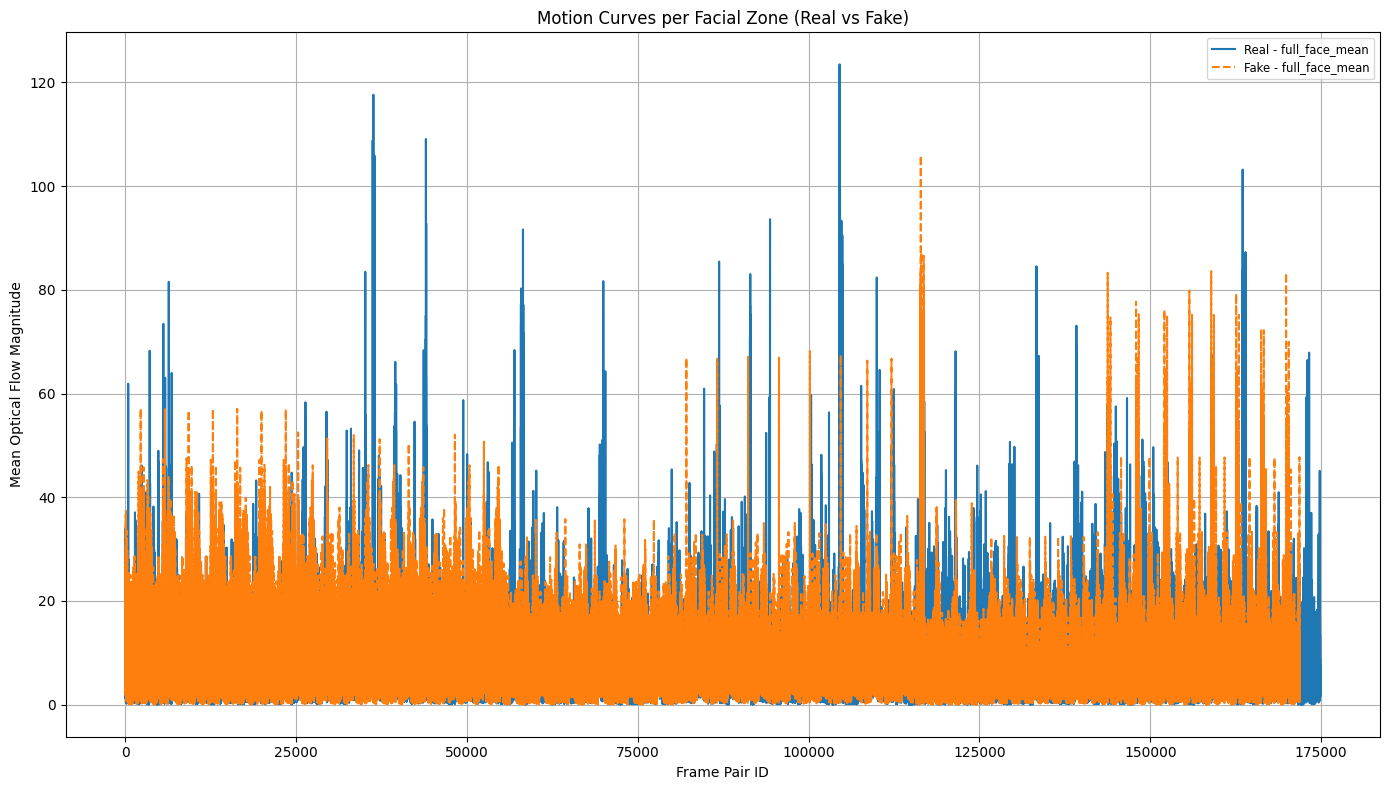

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Load the combined motion features
df = pd.read_csv("D:\DETECTION 1.0\Celeb-DF\combined_motion.csv")

# ✅ Define zones (ensure they exist in your file)
zones = [col for col in df.columns if "_mean" in col and col != 'pair_id']

# ✅ Group by pair_id and label
real_avg = df[df['label'] == 0].groupby('pair_id')[zones].mean()
fake_avg = df[df['label'] == 1].groupby('pair_id')[zones].mean()

# ✅ Plot each zone's motion curve
plt.figure(figsize=(14, 8))
for zone in zones:
    if zone in real_avg.columns and zone in fake_avg.columns:
        plt.plot(real_avg[zone], label=f'Real - {zone}', linestyle='-')
        plt.plot(fake_avg[zone], label=f'Fake - {zone}', linestyle='--')

plt.title("Motion Curves per Facial Zone (Real vs Fake)")
plt.xlabel("Frame Pair ID")
plt.ylabel("Mean Optical Flow Magnitude")
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


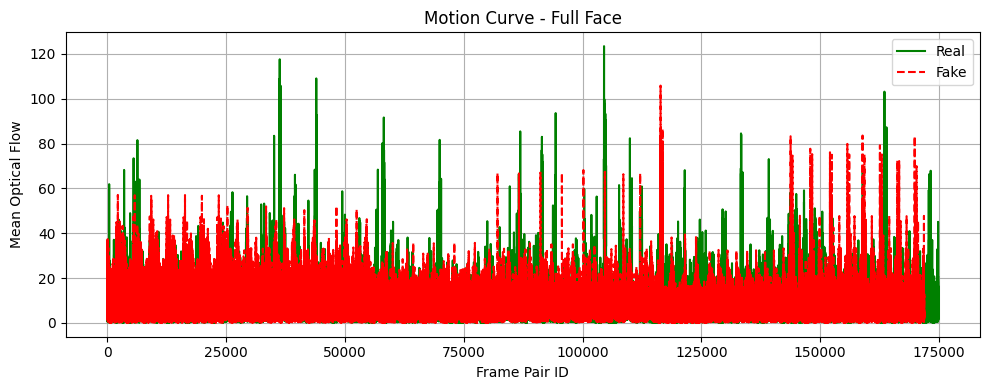

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the motion feature CSV
df = pd.read_csv("D:\DETECTION 1.0\Celeb-DF\combined_motion.csv")

# Extract zone columns with "_mean"
zones = [col for col in df.columns if "_mean" in col and col != 'pair_id']

# Group by pair_id and label
real_avg = df[df['label'] == 0].groupby('pair_id')[zones].mean()
fake_avg = df[df['label'] == 1].groupby('pair_id')[zones].mean()

# Plot separately for each zone
for zone in zones:
    if zone in real_avg.columns and zone in fake_avg.columns:
        plt.figure(figsize=(10, 4))
        plt.plot(real_avg[zone], label='Real', color='green', linestyle='-')
        plt.plot(fake_avg[zone], label='Fake', color='red', linestyle='--')
        plt.title(f"Motion Curve - {zone.replace('_mean', '').replace('_', ' ').title()}")
        plt.xlabel("Frame Pair ID")
        plt.ylabel("Mean Optical Flow")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_24964\3020875079.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Real', 'Fake'])


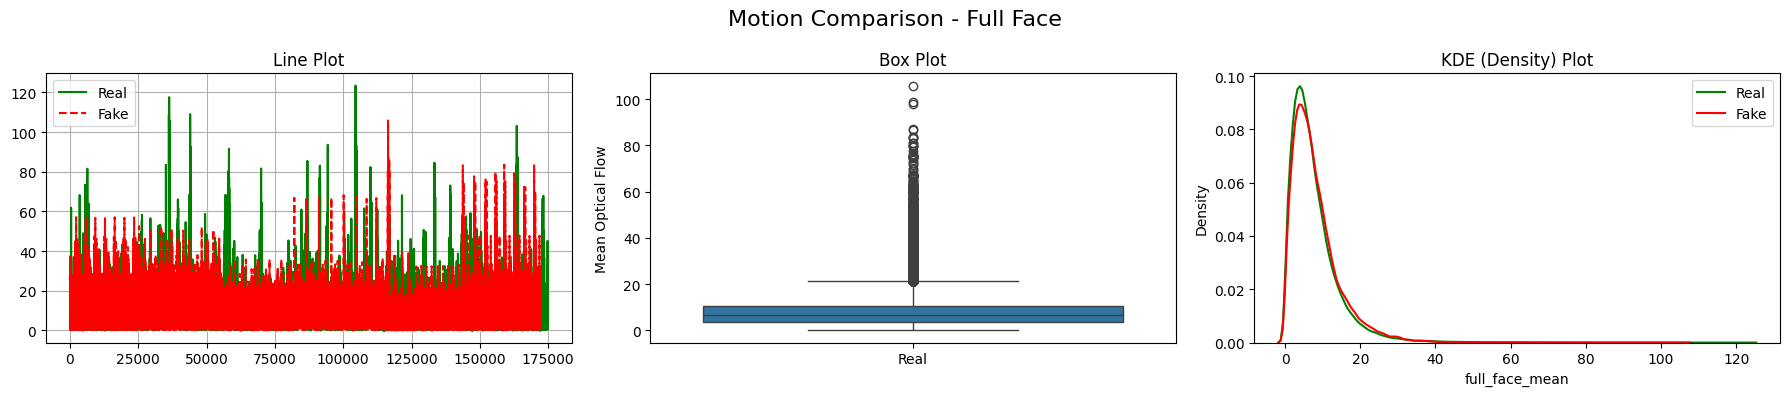

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load combined motion features
df = pd.read_csv("D:\DETECTION 1.0\Celeb-DF\combined_motion.csv")

# Extract motion feature columns
zones = [col for col in df.columns if "_mean" in col and col != 'pair_id']

# Group by pair_id and label
real_avg = df[df['label'] == 0].groupby('pair_id')[zones].mean()
fake_avg = df[df['label'] == 1].groupby('pair_id')[zones].mean()

# Plotting in different styles
for zone in zones:
    if zone in real_avg.columns and zone in fake_avg.columns:
        fig, axes = plt.subplots(1, 3, figsize=(18, 4))
        fig.suptitle(f"Motion Comparison - {zone.replace('_mean', '').replace('_', ' ').title()}", fontsize=16)

        # 1. Line Plot
        axes[0].plot(real_avg[zone], label='Real', color='green', linestyle='-')
        axes[0].plot(fake_avg[zone], label='Fake', color='red', linestyle='--')
        axes[0].set_title("Line Plot")
        axes[0].legend()
        axes[0].grid(True)

        # 2. Box Plot (distribution across pair_id)
        sns.boxplot(data=[real_avg[zone], fake_avg[zone]], ax=axes[1])
        axes[1].set_xticklabels(['Real', 'Fake'])
        axes[1].set_title("Box Plot")
        axes[1].set_ylabel("Mean Optical Flow")

        # 3. KDE Plot (density)
        sns.kdeplot(real_avg[zone], label='Real', ax=axes[2], color='green')
        sns.kdeplot(fake_avg[zone], label='Fake', ax=axes[2], color='red')
        axes[2].set_title("KDE (Density) Plot")
        axes[2].legend()

        plt.tight_layout()
        plt.show()
